In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 사용 함수

In [3]:
# 한글 패치 진행

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [4]:
# 파이차트 만들기 함수

def make_pie_chart(df_list,colname = "연령대"):

    # 데이터 수 만큼 파이차트 생성 가능하도록 설정
    fig, ax = plt.subplots(1,len(df_list),figsize = (15,5))

    # 데이터 수 만큼 파이차트 생성
    for i, df in enumerate(df_list):
        age_counts = df[[colname]].value_counts().head(10)
        labels = age_counts.index.tolist()
        sizes = age_counts.values

        # i 번째 위치에 파이차트 생성성
        ax[i].pie(sizes,
           labels = labels,
           #explode=explode,
           autopct = '%1.1f%%',
           shadow = True, startangle= 90)
        ax[i].set_title(f"{2021 + i} {colname} 파이차트")

    plt.show()

In [5]:
# Butterfly Plot 그리기 함수

def make_butterfly_chart(df1, df2, year = 2020):

    # Butterfly Chart

    plt.figure(figsize = (10,6))

    # 데이터 그리기
    sns.barplot(data = df1, y = '가맹점업종명', x = 'count' , color = 'BLue', label = '2030', errorbar=None)
    sns.barplot(data = df2, y = '가맹점업종명', x = 'count' , color = 'Red', label = '4050', errorbar=None ,estimator = lambda x: -sum(x))

    # 축과 레이블 설정
    plt.axvline(0, color = 'grey', linestyle = '--')
    plt.axis('tight')
    plt.subplots_adjust(left = 0.1, right = 0.9, top = 0.9, bottom = 0.1)

    # 가독성 위해 축 삭제
    plt.gca().spines['top'].set_visible(False)   
    plt.gca().spines['right'].set_visible(False) 
    plt.gca().spines['left'].set_visible(False)    
    plt.gca().spines['bottom'].set_visible(False)   

    plt.title(f"{year}년 세대별 소비 횟수 비교", fontsize=17)
    plt.show()

In [6]:
# 두 집단의 범주 차이 비교

# 나이대로 데이터 분할

#capital_2030 = capital_data[capital_data['연령대'].isin(['20대', '30대'])]
#capital_4050 = capital_data[capital_data['연령대'].isin(['40대', '50대'])]

def age_compare_(category_col_1, category_col_2, category_name, df1, df2, hue = '성별'):

    fig, ax = plt.subplots(1,2,figsize = (14,6))

    sns.barplot(x = df1[category_col_1][df1[category_col_2] == category_name].value_counts(normalize=True).head(10).index,
                y = df1[category_col_1][df1[category_col_2] == category_name].value_counts(normalize=True).head(10).values,
                ax = ax[0], #hue=df1[hue][df1[category_col_2] == category_name].head(10) if hue else None
                )
    #ax[0].pick_params(axis = 'x', rotation = 45)
    ax[0].set_title(f"{category_col_2}, {category_name} Barplot Of df1")

    sns.barplot(x = df2[category_col_1][df2[category_col_2] == category_name].value_counts(normalize=True).head(10).index,
                y = df2[category_col_1][df2[category_col_2] == category_name].value_counts(normalize=True).head(10).values,
                ax = ax[1], #hue=df2[hue][df2[category_col_2] == category_name].head(10) if hue else None
                )
    #ax[1].pick_params(axis = 'x', rotation = 45)
    ax[1].set_title(f"{category_col_1}, {category_name} Barplot Of df2")

    plt.tight_layout()
    plt.show()

# 데이터 확인 및 중분류 전처리
- raw data 기반으로 작업한것과 기본 데이터를 바탕으로 얼마나 차이가 있는지 확인
- 차이가 없거나 매우 적다면 이느 층화추출이 잘 된 결과임을 의미한다.

- 대분류 만으론 산업 구조 및 소비 패턴을 완전히 파악하기가 어렵다고 판단.
- 중분류 데이터를 추가하여 더 정확한 소비 패턴 파악을 시도.


In [7]:
DATA_PATH = 'C:/Users/campus3S031/Desktop/iM뱅크 프로젝트용 데이터/raw_data/'
csv_names = [
    'iMBANK_CARD_DATA_2021(K-DigitalTraining).csv', 
    'iMBANK_CARD_DATA_2022(K-DigitalTraining).csv', 
    'iMBANK_CARD_DATA_2023(K-DigitalTraining).csv', 
    'iMBANK_CUSTOMER_DATA_2021(K-DigitalTraining).csv', 
    'iMBANK_CUSTOMER_DATA_2022(K-DigitalTraining).csv', 
    'iMBANK_CUSTOMER_DATA_2023(K-DigitalTraining).csv'
    ]
datasets = {}
def read_data(csv_names):
    for i in range(len(csv_names)):
        datasets[f"data_{i+1}"] = pd.read_csv(f"{DATA_PATH}{csv_names[i]}", encoding='cp949')

        print(f'data input complete! : {csv_names[i]} as data_{i+1}')
    print('All data read complete!')

read_data(csv_names)

## 2차 중분류 추가

In [17]:
# 중분류
# 대분류를 더 세세하게 분류하는데 초점을 두되, 의료나 온라인 쇼핑 등 필요하다면 추가 분류 기준을 만듬.

food_related = [
    '기타건강식품', '기타음료식품', '서양음식', '정육점', '제과점', '주점', '유흥주점', '단란주점', '일반한식', '일식·회집', '스넥', '중국식', '칵테일바', '편 의 점',
    '농,축협직영매장', '농·축·수산품', '농축수산가공품',  '주류판매점'
]

retail = [
    '가 방', '기타 사무용품', '기타잡화', '기타전기제품', '대형할인점', 
    '목재·석재·철물', '문구용품', '소프트웨어', '슈퍼마켓',
    '자동차부품', '종합용역', '출판 및 인쇄물', '컴퓨터', '통신기기', '홍삼제품', 
    '화원', 'DP&E', '기계공구', '기념품점', '사무용 OA기기', '미곡상', '비료,사료,종자',  
    '화방·표구점', '민예·공예품', '면 세 점', '인테리어전문', '조명기구', '보일러·펌프·샷시', '건축용 요업제품', '페인트', '음반영상물', '농기계', 
    '시 계', '단체복', '제 화', '농협하나로클럽','아동의류', '연 쇄 점', '완구점'
]

life = [
    '가전제품', '기타가구', '기타의류', '신 발', '안경', '액세서리', '일반가구',
    '일반서적', '내의판매', '세탁소', '화장품', '침구·수예점', '신 발', '안경', '귀금속','정수기', '정장',
    '주방용구', '주방용식기'
]

med = [
    '의료용품', '치과의원', '종합병원', '한방병원', '치과병원', '기타의료기관 및 기타의료기기','병 원(응급실운영)',
    '한 의 원', '약 국',  '의 원', '건강진단', '동물병원'
]

online = [
    '인터넷Mall', '인터넷종합Mall', 'CATV홈쇼핑','CATV'
]

education = [
    '학원', '독서실', '기타 교육기관', '학습지교육', '초중고교육기관', '유아원', '기능학원', '예·체능계학원',
    '외국어학원', '보습학원', '전문서적'
]

service = [
    '가례서비스업', '공공요금대행서비스/소득공제대상', '공공요금대행서비스/소득공제비대상', '기타대인서비스',
    '미용원', '미용재료', '사무서비스', '조세서비스', '통신서비스/소득공제비대상',
    '피부미용실', '혼례서비스업', '애완동물',
    '기타숙박업', '보관및 창고업', '비씨카드 정산용(할인)',
    '위탁급식업', '상품권전문판매', '부동산중개·임대', 
    '이동통신요금', '일반(통신판매)', '통신판매업1', '티켓', '맞춤복점',
    'PG상품권', '가정용품수리', '구내매점(국가기관등)', '손해보험', '전자상거래상품권전문판매', 
    '위성방송', '비씨카드 정산용가맹점', '비영리/대상', '비영리/비대상', '사무·통신기기수리', '상 품 권', '생명보험',
    '자사카드발행백화점', '전자상거래상품권', '이용원'
]

lesuire = [
    '골프경기장', '골프연습장', '스크린골프','당구장','스포츠·레져용품', '스포츠의류', '기타레져업소', '레져업소',
    '영화관', '헬스클럽', '종합레져타운', '수족관', '콘도', '안마/스포츠마사지', '관광여행', '노 래 방',
    '문화취미기타', '수 영 장', '골프용품 전문점', '사우나', '볼 링 장', '1급 호텔', '특급호텔', '2급 호텔',
]

transportation = [
    'E1가스충전소', 'GS가스충전소', 'GS주유소', 'SK가스충전소', 'SK주유소', '고속버스', '렌터카', '전기차충전소', '주유소', '철도', '택시', '항공사', 
    '현대정유가스충전소', '화물운송', '쌍용S-OIL가스충전소', '여객선', 'LPG취급점', '현대정유(오일뱅크)', '쌍용S-OIL', '유류판매', '자동차시트·타이어',
    '주차장', '세차장',  '자동차정비'
]

others = ['기타 전문점', '기타1', '기타건축자재', '기타용역서비스', '기타유통업', '업종미등록', '기타수리서비스', '기타4', '갈비전문점', '이륜차판매']

In [18]:
# 중분류 mapping -> 대분류 매핑때 썼던 코드 사용

categorizing_list2 = [food_related, retail, life, med, online, education, service, lesuire, transportation, others]
categorizing_list_name2 = ['식생활', '소매', '라이프스타일', '의료', '온라인쇼핑', '교육', '서비스', '여가','교통_및_물류', '기타']

# 매핑 딕셔너리 생성
mapping_dict2 = {}
for i, clist in enumerate(categorizing_list2):
    for item in clist:
        mapping_dict2[item] = categorizing_list_name2[i]

# 매핑 통해서 적용
# 위에서 분류되지 않은 na들은 모두 인터넷P/G로 매핑, 인터넷P/G가 제일 비중이 큼.
data['가맹점업종명_범주화_중분류'] = data['가맹점업종명'].map(mapping_dict2).fillna('인터넷P/G')

In [19]:
# 데이터 확인

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21333200 entries, 0 to 21333199
Data columns (total 18 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   거래년월            object
 1   고객ID            int64 
 2   가맹점업종명          object
 3   가맹점_광역시도        object
 4   가맹점_시군구         object
 5   승인건수            object
 6   승인금액            int64 
 7   연령대             object
 8   성별              object
 9   고객등급            object
 10  자택_시도           object
 11  자택_시군구          object
 12  승인건수_수치화        int64 
 13  거래년월_분기         int64 
 14  거래월             object
 15  년도              int64 
 16  가맹점업종명_범주화      object
 17  가맹점업종명_범주화_중분류  object
dtypes: int64(5), object(13)
memory usage: 2.9+ GB


In [20]:
#data2.info()

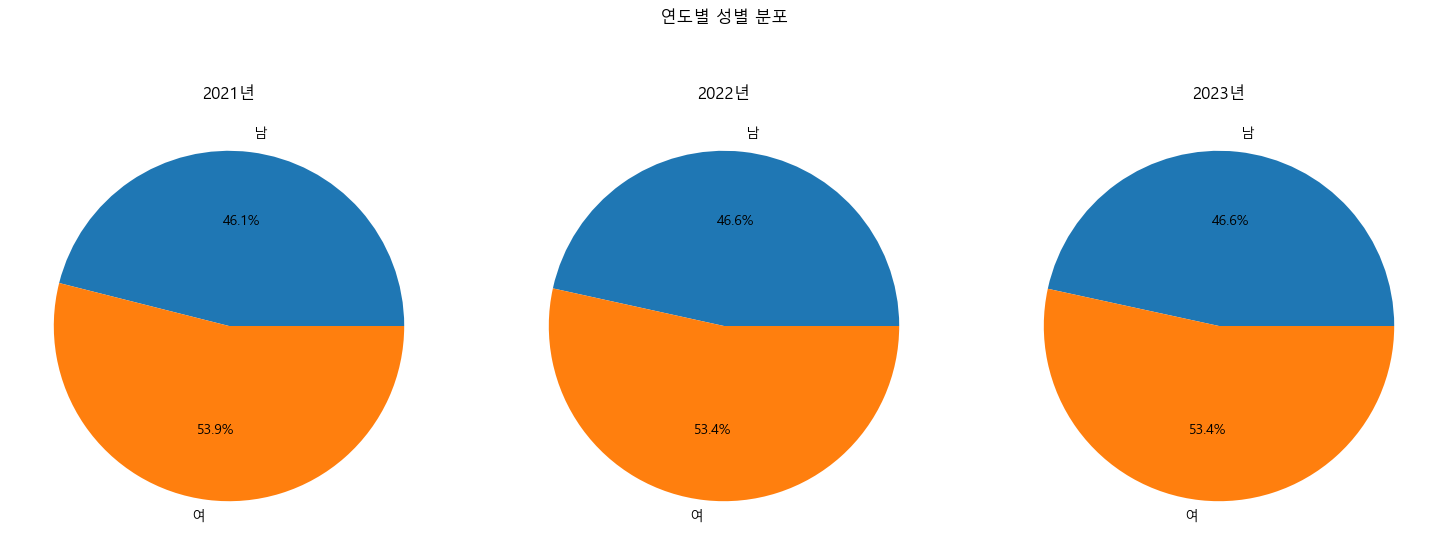

In [21]:
# 연도별 성별 분포(sampling된 데이터를 기반으로)확인용 파이 차트 표

def plot_gender_pie_by_year(data):
    # 년도별로 성별 데이터 집계
    gender_by_year = data.groupby(['년도', '성별']).size().unstack()
    
    # 파이 차트 생성
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # 각 년도별로 파이 차트 그리기
    for idx, year in enumerate(sorted(data['년도'].unique())):
        year_data = gender_by_year.loc[year]
        axes[idx].pie(year_data, labels=year_data.index, autopct='%1.1f%%')
        axes[idx].set_title(f'{year}년')
    
    # 세부 설정
    plt.suptitle('연도별 성별 분포', y=1.1)
    plt.tight_layout()
    plt.show()

# 데이터로 파이 차트 그리기 
plot_gender_pie_by_year(data)

In [22]:
# 원본 데이터로도 동일한 파이 차트 그리기
# plot_gender_pie_by_year(data2)

### 데이터에서 인터넷P/G 삭제

In [23]:
# 인터넷P/G 제거
# 인터넷P/G는 비중이 너무 높아서 제거 + 인터넷P/G는 소비 패턴 파악이 불가능함.

data = data[data['가맹점업종명_범주화'] != '인터넷P/G']

In [24]:
data.shape

(21331565, 18)

# 시각화


- 연령대 - 성별로 묶어 총 12개의 그룹을 생성함.
- 각 그룹 별로 어떤 소비 패턴을 가지며, 어떤 그룹끼리 묶어서 같은 혜택을 줄까 파악하기 위함
- 항상 시각화 자료를 먼저 제시하고 이후 통계분석 결과를 제시할 것.

In [25]:
data.columns

Index(['거래년월', '고객ID', '가맹점업종명', '가맹점_광역시도', '가맹점_시군구', '승인건수', '승인금액', '연령대',
       '성별', '고객등급', '자택_시도', '자택_시군구', '승인건수_수치화', '거래년월_분기', '거래월', '년도',
       '가맹점업종명_범주화', '가맹점업종명_범주화_중분류'],
      dtype='object')

In [26]:
# 연령대-성별 그룹화의 시각화
# 실질적으로 소비 금액, 소비 건수(수치화)만을 볼 수 있는 시각화

def plot_age_gender_amount_2(colname1, colname2, calc = 'sum', data = data, standard = '승인금액'):
    # 그룹 수에 맞는 서브 플롯 생성
    fig, axes = plt.subplots(6, 2, figsize=(15, 30))  # 6 rows, 2 columns
 
    plot_idx = 0
    # 연령대 및 성별 정의
    standard1 = data[colname1].unique()
    standard2 = data[colname2].unique()
    standard1.sort()
    standard2.sort()
    for a in standard1:
        for b in standard2:
            # 각 그룹별로 데이터 필터링하기
            subset = data[(data[colname1] == a) & (data[colname2] == b)]

            if not subset.empty:
                # 각 그룹별로 월별 합계 계산
                # 각각 합계, 평균, 건수 계산 가능
                # 일일히 코드를 바꾸긴 귀찮고, 함수를 직접 쓰는 건 까다로우니 정해서 입력하는 걸로.

                # standard(기준)에 따라 합계, 평균, 건수 계산
                if calc == 'sum':
                    monthly_sum_amount = subset.groupby('거래년월')[standard].sum().reset_index()
                elif calc == 'mean':
                    monthly_sum_amount = subset.groupby('거래년월')[standard].mean().reset_index()
                elif calc == 'count':
                    monthly_sum_amount = subset.groupby('거래년월')[standard].count().reset_index()

                # 각 그룹별로 시각화 - 꺾은선 그래프 활용
                ax = axes[plot_idx // 2, plot_idx % 2]
                sns.lineplot(data=monthly_sum_amount, x='거래년월', y=standard, ax=ax)
                ax.set_title(f"{b} - {a} [{standard}의 {calc}]")
                ax.set_xlabel("거래년월") # 달 별로 나뉘므로 필요함.
                ax.set_ylabel(f"{standard} {calc}")
                ax.tick_params(axis='x', rotation=45)

                plot_idx += 1

            # 외부 설정
    plt.tight_layout()
    plt.show()

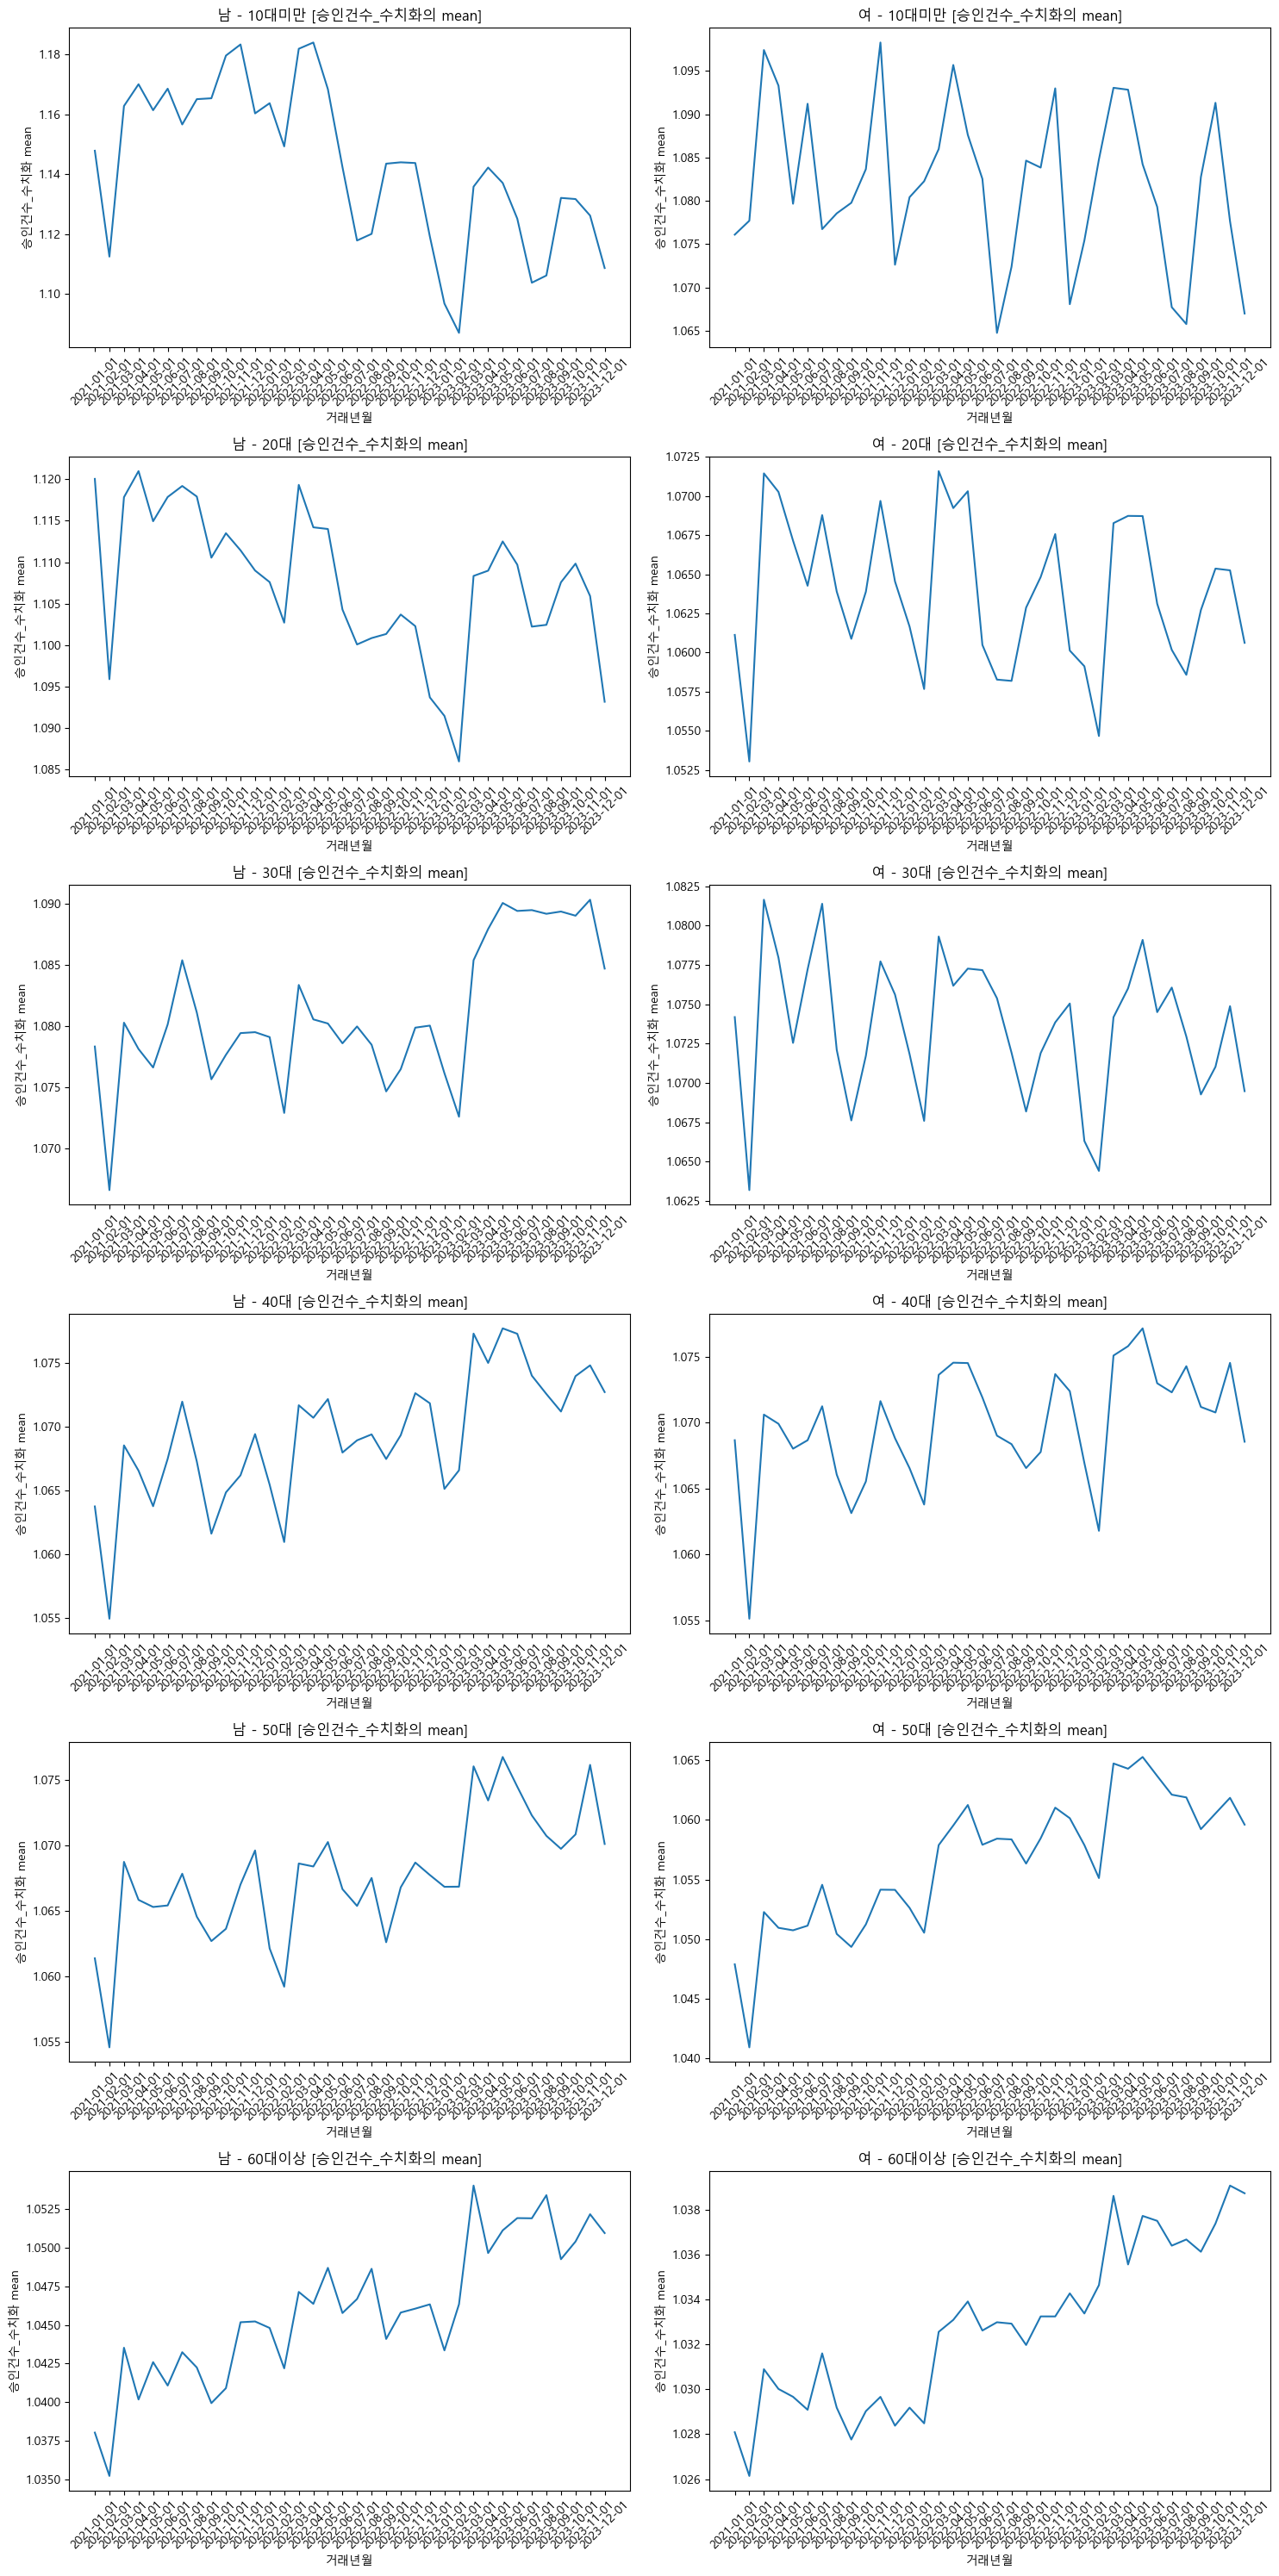

In [27]:
plot_age_gender_amount_2('연령대', '성별', calc = 'mean', standard='승인건수_수치화')

KeyError: '금리'

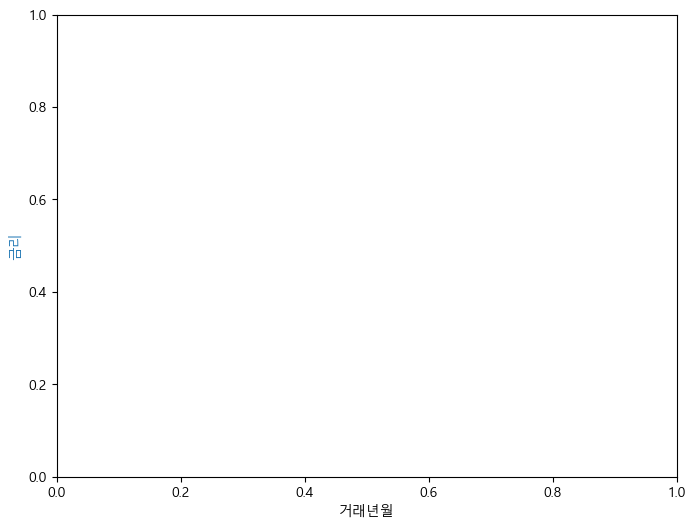

In [28]:
# 거시적 데이터 시각화 - 금리와 소비자심리지수 추이 (분기 바탕)

fig, ax1 = plt.subplots(figsize=(8, 6))

# 금리 그래프 (왼쪽 y축)
color1 = 'tab:blue'
ax1.set_xlabel('거래년월')
ax1.set_ylabel('금리', color=color1)
ax1.plot(data['거래년월'], data['금리'], color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# 소비자심리지수 그래프 (오른쪽 y축)
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('소비자심리지수', color=color2)
ax2.plot(data['거래년월'], data['소비자심리지수'], color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.xticks(rotation = 45)
plt.title('금리와 소비자심리지수 추이')
plt.tight_layout()
plt.show()

## 클러스터링
- K-means
- GMM
- 계층적 군집화

로그 변환은 크게 의미가 없는 듯 함.

## 연령-성별 그룹화

In [29]:
# Kmeans에 대한 이론적 학습도 필요하다.
from sklearn.cluster import KMeans

# 계층적 군집화 적용 및 던드로그램
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture

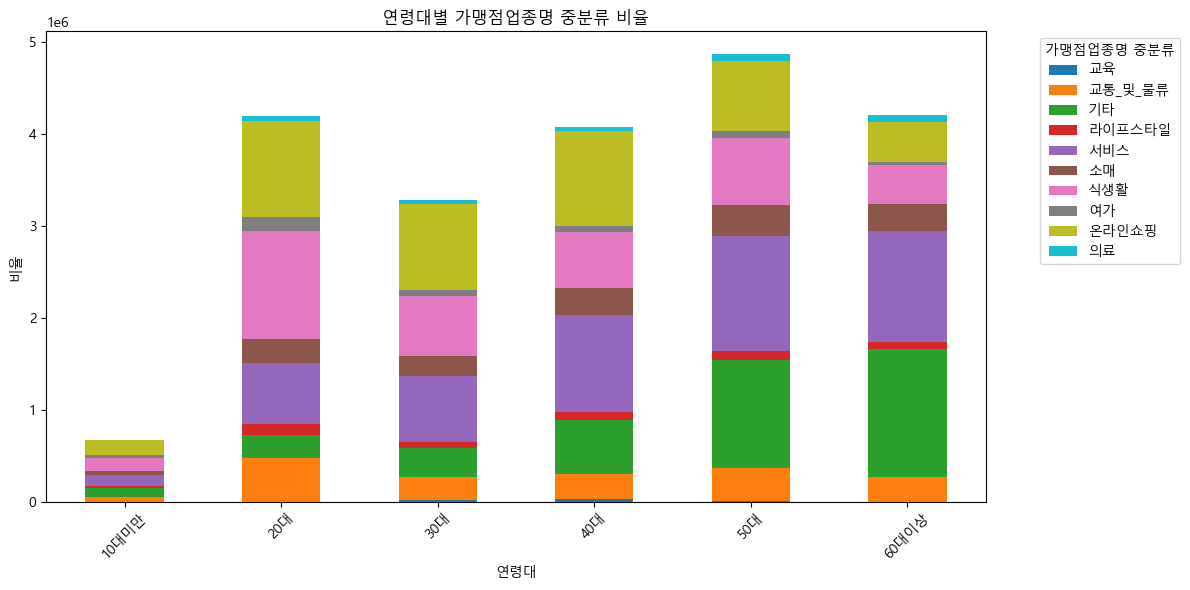

In [30]:
# 연령대별 가맹점업종명_범주화_중분류 비율 시각화
# 성별 고려 안하고 일단 연령별로 주 소비 패턴을 본다.
age_category_data = data.groupby('연령대')['가맹점업종명_범주화_중분류'].value_counts().unstack()

ax = age_category_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('연령대별 가맹점업종명 중분류 비율')
plt.xlabel('연령대')
plt.ylabel('비율')
plt.legend(title='가맹점업종명 중분류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# 필요할떄만 실행하는 코드
# 10대미만은 거래 건수가 너무 적기 때문에 제외해도 될 듯하다.

data_saved = data
data = data[data['연령대'] != '10대미만']

### 계층적 군집화

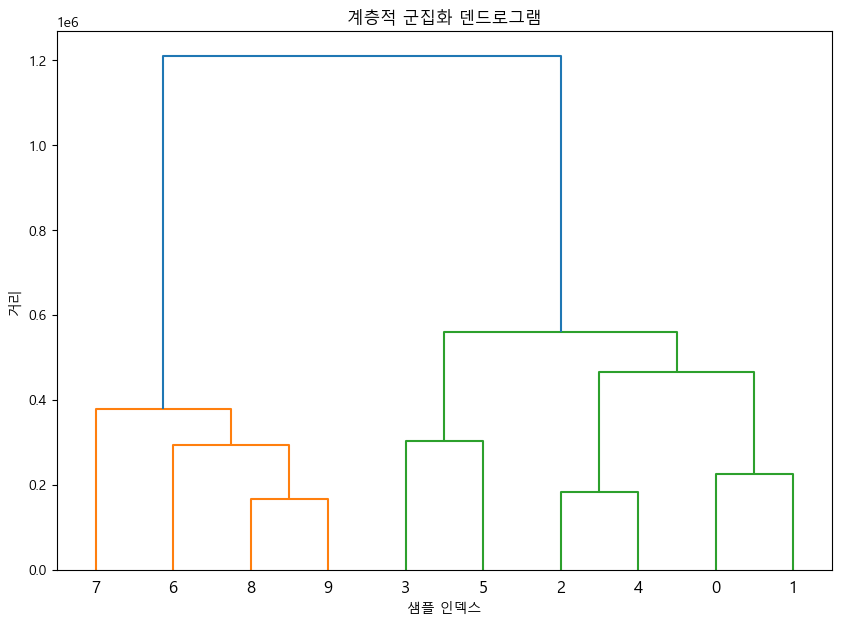


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 그룹: 20대-남, 20대-여, 30대-남, 40대-남

주요 업종 비율:
식생활비율: 25.2%
식생활의 그룹 내 거래 횟수 평균: 479778.75 

온라인쇼핑비율: 22.7%
온라인쇼핑의 그룹 내 거래 횟수 평균: 431179.75 

서비스비율: 19.1%
서비스의 그룹 내 거래 횟수 평균: 363872.75 

교통_및_물류비율: 10.1%
교통_및_물류의 그룹 내 거래 횟수 평균: 192381.25 

기타비율: 9.3%
기타의 그룹 내 거래 횟수 평균: 176576.75 

소매비율: 6.5%
소매의 그룹 내 거래 횟수 평균: 123858.25 

여가비율: 2.9%
여가의 그룹 내 거래 횟수 평균: 54422.75 

라이프스타일비율: 2.4%
라이프스타일의 그룹 내 거래 횟수 평균: 45747.25 

의료비율: 1.4%
의료의 그룹 내 거래 횟수 평균: 27346.25 

교육비율: 0.3%
교육의 그룹 내 거래 횟수 평균: 5103.0 

--------------------------------------------------

Cluster 1 특징:
포함된 그룹: 50대-남, 50대-여, 60대이상-남, 60대이상-여

주요 업종 비율:
기타비율: 28.3%
기타의 그룹 내 거래 횟수 평균: 643100.75 

서비스비율: 27.0%
서비스의 그룹 내 거래 횟수 평균: 613056.5 

온라인쇼핑비율: 13.2%
온라인쇼핑의 그룹 내 거래 횟수 평균: 300697.0 

식생활비율: 12.6%
식생활의 그룹 내 거래 횟수 평균: 287017.75 

소매비율: 7.0%
소매의 그룹 내 거래 횟수 평균: 159042.0 

교통_및_물류비율: 6.9%
교통_및_물류의 그룹 내 거래 횟수 평균: 156961.5 

라이프스타일비율: 1.9%
라이프스타일의 그룹 내 거래 횟수 평균: 43889.75 

의료비율: 1.8%
의료의 그룹 내 거래 횟수 평균: 40596

<Figure size 1200x800 with 0 Axes>

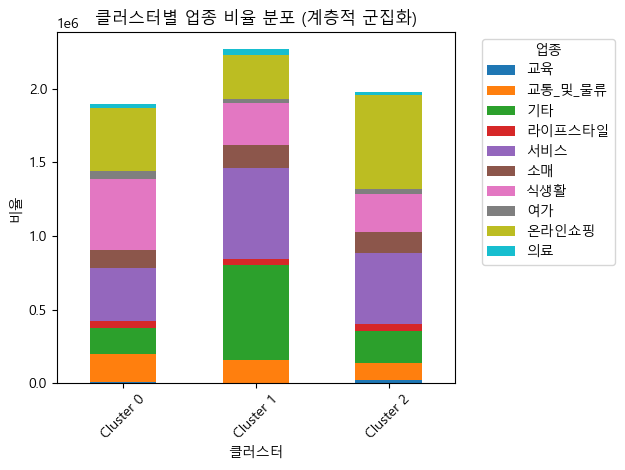

In [32]:
# 데이터 전처리 - 더 단순하게
# 데이터는 비율이 아니라 실측이 더 클러스터링에 유의하다!
grouped_data = data.groupby(['연령대', '성별', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
#grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) # 비율로 만들거나 아니거나

# 계층적 군집화 수행
hierarchical = AgglomerativeClustering(n_clusters=3)
clusters = hierarchical.fit_predict(grouped_data)

# 덴드로그램 시각화 - linkage?
plt.figure(figsize=(10, 7))
linkage_matrix = linkage(grouped_data, method='ward', metric='euclidean')
dendrogram(linkage_matrix)
plt.title('계층적 군집화 덴드로그램')
plt.xlabel('샘플 인덱스')
plt.ylabel('거리')
plt.show()

#-----------------------------------------------------이 아래는 사실상 시각화

# 클러스터별 평균 계산 리스트 생성
cluster_means = []

# 3개의 그룹으로 클러스팅 하였으므로 3개의 평균 계산
# clusters가 계층적 군집화를 적용 및 예측한 모델
for i in range(3):
    cluster_mask = clusters == i
    cluster_data = grouped_data[cluster_mask]
    cluster_means.append(cluster_data.mean())

# 클러스터별 특징 출력
print("\n=== 각 클러스터의 특징 ===\n")
for i in range(3):
    # 각 클러스터 별 구성 요소 를 cluster_groups에 저장
    cluster_groups = grouped_data.index[clusters == i]
    print(f"\nCluster {i} 특징:")
    print(f"포함된 그룹: {', '.join([f'{idx[0]}-{idx[1]}' for idx in cluster_groups])}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means[i].sort_values(ascending=False).items():
        ratio_pct = ratio / cluster_means[i].sum()  # 비율로 변환
        print(f"{category}비율: {ratio_pct:.1%}")
        print(f"{category}의 그룹 내 거래 횟수 평균: {round(ratio, 2)} \n")
    print("-" * 50)

# 각 클러스터를 모아서 DataFrame으로 변환 - 시각화용
cluster_means_df = pd.DataFrame(cluster_means, index=[f'Cluster {i}' for i in range(3)])

# Stacked Bar Plot 그리기
plt.figure(figsize=(12, 8))
cluster_means_df.plot(kind='bar', stacked=True) #이게 더 편한듯.
plt.title('클러스터별 업종 비율 분포 (계층적 군집화)')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### GMM


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 그룹: 30대-여, 40대-남, 40대-여

주요 업종 비율:
온라인쇼핑비율: 28.1%
온라인쇼핑의 그룹 내 거래 횟수 평균: 537658.67 

서비스비율: 24.8%
서비스의 그룹 내 거래 횟수 평균: 474901.33 

식생활비율: 14.6%
식생활의 그룹 내 거래 횟수 평균: 280336.67 

기타비율: 12.5%
기타의 그룹 내 거래 횟수 평균: 240229.67 

소매비율: 7.1%
소매의 그룹 내 거래 횟수 평균: 136650.67 

교통_및_물류비율: 6.4%
교통_및_물류의 그룹 내 거래 횟수 평균: 122206.67 

라이프스타일비율: 2.4%
라이프스타일의 그룹 내 거래 횟수 평균: 46571.33 

여가비율: 1.8%
여가의 그룹 내 거래 횟수 평균: 33950.67 

의료비율: 1.3%
의료의 그룹 내 거래 횟수 평균: 24915.33 

교육비율: 1.0%
교육의 그룹 내 거래 횟수 평균: 18360.67 

--------------------------------------------------

Cluster 1 특징:
포함된 그룹: 50대-남, 50대-여, 60대이상-남, 60대이상-여

주요 업종 비율:
기타비율: 28.3%
기타의 그룹 내 거래 횟수 평균: 643100.75 

서비스비율: 27.0%
서비스의 그룹 내 거래 횟수 평균: 613056.5 

온라인쇼핑비율: 13.2%
온라인쇼핑의 그룹 내 거래 횟수 평균: 300697.0 

식생활비율: 12.6%
식생활의 그룹 내 거래 횟수 평균: 287017.75 

소매비율: 7.0%
소매의 그룹 내 거래 횟수 평균: 159042.0 

교통_및_물류비율: 6.9%
교통_및_물류의 그룹 내 거래 횟수 평균: 156961.5 

라이프스타일비율: 1.9%
라이프스타일의 그룹 내 거래 횟수 평균: 43889.75 

의료비율: 1.8%
의료의 그룹 내 거래 횟수 평균: 40596.75 


<Figure size 1200x800 with 0 Axes>

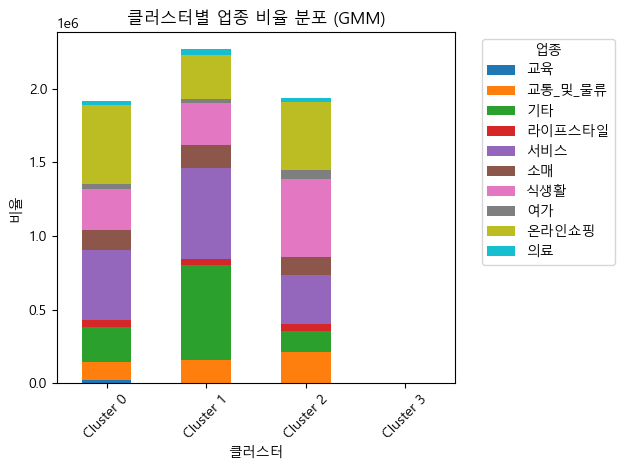


GMM 모델 평가:
로그 가능도 점수: 13.92


In [33]:
# 데이터 전처리 - 연령대, 성별을 기준으로 5개의 그룹으로 그룹화 하고자 한다.
# 사실 덴드로그램에 따르면 2개가 더 합리적이긴 하지만...

grouped_data = data.groupby(['연령대', '성별', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
#grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) #비율로 보고 싶으면 적용

# GMM 적용
gmm = GaussianMixture(n_components=3, random_state=42)
clusters = gmm.fit_predict(grouped_data)

#-----------------------------------------------------이 아래는 사실상 시각화

# 클러스터별 평균 계산
cluster_means = []
for i in range(4):
    cluster_mask = clusters == i
    cluster_data = grouped_data[cluster_mask]
    cluster_means.append(cluster_data.mean())

# 클러스터별 특징 출력
print("\n=== 각 클러스터의 특징 ===\n")
for i in range(4):
    cluster_groups = grouped_data.index[clusters == i]
    print(f"\nCluster {i} 특징:")
    print(f"포함된 그룹: {', '.join([f'{idx[0]}-{idx[1]}' for idx in cluster_groups])}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means[i].sort_values(ascending=False).items():
        ratio_pct = ratio / cluster_means[i].sum() # 비율로 변환
        print(f"{category}비율: {ratio_pct:.1%}")
        print(f"{category}의 그룹 내 거래 횟수 평균: {round(ratio, 2)} \n")
    print("-" * 50)

# DataFrame으로 변환
cluster_means_df = pd.DataFrame(cluster_means, index=[f'Cluster {i}' for i in range(4)])

# Stacked Bar Plot 그리기
plt.figure(figsize=(12, 8))
cluster_means_df.plot(kind='bar', stacked=True)
plt.title('클러스터별 업종 비율 분포 (GMM)')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# GMM 모델의 로그 가능도 출력 - 만점은 딱히 없고 높으면 높을수록 좋다!
print("\nGMM 모델 평가:")
print(f"로그 가능도 점수: {gmm.score(grouped_data):.2f}")

### K-means - 사용 X
- 군집별 계층화와 GMM을 우선으로 사용하자.


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 그룹: 30대-여, 40대-남, 40대-여

주요 업종 비율:
온라인쇼핑비율: 28.1%
온라인쇼핑의 그룹 내 거래 횟수 평균: 537658.67 

서비스비율: 24.8%
서비스의 그룹 내 거래 횟수 평균: 474901.33 

식생활비율: 14.6%
식생활의 그룹 내 거래 횟수 평균: 280336.67 

기타비율: 12.5%
기타의 그룹 내 거래 횟수 평균: 240229.67 

소매비율: 7.1%
소매의 그룹 내 거래 횟수 평균: 136650.67 

교통_및_물류비율: 6.4%
교통_및_물류의 그룹 내 거래 횟수 평균: 122206.67 

라이프스타일비율: 2.4%
라이프스타일의 그룹 내 거래 횟수 평균: 46571.33 

여가비율: 1.8%
여가의 그룹 내 거래 횟수 평균: 33950.67 

의료비율: 1.3%
의료의 그룹 내 거래 횟수 평균: 24915.33 

교육비율: 1.0%
교육의 그룹 내 거래 횟수 평균: 18360.67 

--------------------------------------------------

Cluster 1 특징:
포함된 그룹: 50대-남, 50대-여, 60대이상-남, 60대이상-여

주요 업종 비율:
기타비율: 28.3%
기타의 그룹 내 거래 횟수 평균: 643100.75 

서비스비율: 27.0%
서비스의 그룹 내 거래 횟수 평균: 613056.5 

온라인쇼핑비율: 13.2%
온라인쇼핑의 그룹 내 거래 횟수 평균: 300697.0 

식생활비율: 12.6%
식생활의 그룹 내 거래 횟수 평균: 287017.75 

소매비율: 7.0%
소매의 그룹 내 거래 횟수 평균: 159042.0 

교통_및_물류비율: 6.9%
교통_및_물류의 그룹 내 거래 횟수 평균: 156961.5 

라이프스타일비율: 1.9%
라이프스타일의 그룹 내 거래 횟수 평균: 43889.75 

의료비율: 1.8%
의료의 그룹 내 거래 횟수 평균: 40596.75 


<Figure size 1200x800 with 0 Axes>

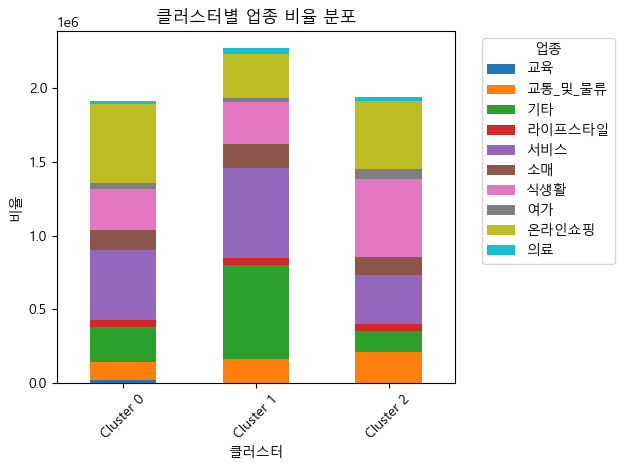

In [34]:
# 데이터 전처리 - 연령대, 성별을 기준으로 5개의 그룹으로 그룹화 하고자 한다.
# 그룹화 근거는 없음

grouped_data = data.groupby(['연령대', '성별', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
#grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# K-means 직접 적용
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(grouped_data)

# 클러스터별 평균 계산
cluster_means = []
for i in range(3):
    cluster_mask = clusters == i
    cluster_data = grouped_data[cluster_mask]
    cluster_means.append(cluster_data.mean())

# 클러스터별 특징 출력
print("\n=== 각 클러스터의 특징 ===\n")
for i in range(3):
    cluster_groups = grouped_data.index[clusters == i]
    print(f"\nCluster {i} 특징:")
    print(f"포함된 그룹: {', '.join([f'{idx[0]}-{idx[1]}' for idx in cluster_groups])}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means[i].sort_values(ascending=False).items():
        ratio_pct = ratio / cluster_means[i].sum() # 비율로 변환
        print(f"{category}비율: {ratio_pct:.1%}")
        print(f"{category}의 그룹 내 거래 횟수 평균: {round(ratio, 2)} \n")
    print("-" * 50)

# DataFrame으로 변환
cluster_means_df = pd.DataFrame(cluster_means, index=[f'Cluster {i}' for i in range(3)])

# Stacked Bar Plot 그리기
plt.figure(figsize=(12, 8))
cluster_means_df.plot(kind='bar', stacked=True)
plt.title('클러스터별 업종 비율 분포')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 지역 그룹화

- 시군구별 업종 거래 횟수 비율 계산
- 나이성별떄와는 달리 51개 정도로 더 폭넓음
- 단, 여전히 차원축소 기법을 적용하기엔 모자람.

### 데이터 추가 전처리

- 기타 전문점이 존재
- 그러나 기타 전문점이 불명확
- 인터넷 쇼핑도 비중이 너무 크다


- 기타 및 인터넷쇼핑 중분류 제거

In [35]:
# 기타와 인터넷쇼핑 제거
fixed_data = data[~data['가맹점업종명_범주화_중분류'].isin(['기타', '온라인쇼핑'])]
fixed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12733486 entries, 0 to 21333199
Data columns (total 18 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   거래년월            object
 1   고객ID            int64 
 2   가맹점업종명          object
 3   가맹점_광역시도        object
 4   가맹점_시군구         object
 5   승인건수            object
 6   승인금액            int64 
 7   연령대             object
 8   성별              object
 9   고객등급            object
 10  자택_시도           object
 11  자택_시군구          object
 12  승인건수_수치화        int64 
 13  거래년월_분기         int64 
 14  거래월             object
 15  년도              int64 
 16  가맹점업종명_범주화      object
 17  가맹점업종명_범주화_중분류  object
dtypes: int64(5), object(13)
memory usage: 1.8+ GB


In [36]:
# 업종, 지역별 count 또는 비율 계산 데이터

grouped_data = fixed_data.groupby(['가맹점_시군구', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
grouped_data['총합'] = grouped_data.sum(axis=1)

In [37]:
# 순서대로 정리

sorted_data = grouped_data.sort_values('총합', ascending=False)
sorted_data = sorted_data.iloc[:-5] # 동두천, 연천시, 과천시, 양평군, 도봉구구 3년 전체 거래 건수가 각각 2,5,106건 -> 삭제

<Figure size 1200x800 with 0 Axes>

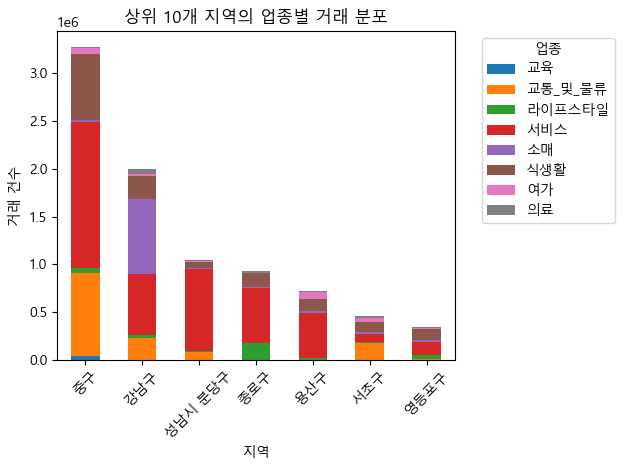

In [38]:
# Stacked Bar Plot 그리기
plt.figure(figsize=(12, 8))
sorted_data.head(7).drop('총합', axis=1).plot(kind='bar', stacked=True)
plt.title('상위 10개 지역의 업종별 거래 분포')
plt.xlabel('지역')
plt.ylabel('거래 건수')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 년도 별 그룹 간 선호 보기

In [39]:
# 그룹화 - 나이 및 성별
# 계층적 군집화, GMM, K-means 기반

def age_gender_group(data):
    # 연령대와 성별에 따른 그룹 매핑 딕셔너리 생성
    age_gender_mapping = {
        ('30대', '남'): 'M',
        ('40대', '남'): 'M', 
        ('40대', '여'): 'M',
        ('50대', '남'): 'O',
        ('50대', '여'): 'O',
        ('60대이상', '남'): 'O',
        ('60대이상', '여'): 'O'
    }
    
    # 연령대와 성별 조합으로 그룹 할당
    data['그룹_나이성별'] = data.apply(
        lambda x: age_gender_mapping.get(
            (x['연령대'], x['성별']), 'Y'
        ),
        axis=1
    )
    
    return data

fixed_data = age_gender_group(fixed_data)

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_11992\625569272.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['그룹_나이성별'] = data.apply(


In [40]:
fixed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12733486 entries, 0 to 21333199
Data columns (total 19 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   거래년월            object
 1   고객ID            int64 
 2   가맹점업종명          object
 3   가맹점_광역시도        object
 4   가맹점_시군구         object
 5   승인건수            object
 6   승인금액            int64 
 7   연령대             object
 8   성별              object
 9   고객등급            object
 10  자택_시도           object
 11  자택_시군구          object
 12  승인건수_수치화        int64 
 13  거래년월_분기         int64 
 14  거래월             object
 15  년도              int64 
 16  가맹점업종명_범주화      object
 17  가맹점업종명_범주화_중분류  object
 18  그룹_나이성별         object
dtypes: int64(5), object(14)
memory usage: 1.9+ GB


In [41]:
# 이 데이터로 무엇을 볼 것인가?
# 그룹별로 나눴으니 그룹별 소비 지역을 보자!!
# 그룹별 3년간 소비 현황을 보는 것도 좋겠다.

fixed_data_industrial = fixed_data.groupby(['그룹_나이성별','가맹점업종명_범주화_중분류', '년도']).size().unstack(fill_value=0)
fixed_data_reginal = fixed_data.groupby(['그룹_나이성별','가맹점_시군구', '년도']).size().unstack(fill_value=0)

def diff_btw_cols(data):
    # 행 별 총합을 제시하고 각 열의 차이를 계산
    data['총합'] = data.sum(axis=1)

    diff_cols = []
    cols = data.columns.tolist()
    
    for i in range(len(cols)-1):
        col_name = f'{cols[i]}_{cols[i+1]}_증감'
        data[col_name] = data[cols[i+1]] - data[cols[i]]
        diff_cols.append(col_name)

    data = data.iloc[:, :-1]
        
    return data

fixed_data_industrial_chg = diff_btw_cols(fixed_data_industrial)
fixed_data_reginal_chg = diff_btw_cols(fixed_data_reginal)

In [42]:
y_industrial = fixed_data_industrial_chg.loc['Y'].sort_values(by='총합', ascending=False)
y_industrial

년도,2021,2022,2023,총합,2021_2022_증감,2022_2023_증감
가맹점업종명_범주화_중분류,,,,,,
식생활,393516,503516,523853,1420885,110000,20337
서비스,389998,336965,306652,1033615,-53033,-30313
교통_및_물류,201523,196549,180631,578703,-4974,-15918
소매,123379,125910,122620,371909,2531,-3290
여가,37861,62589,76566,177016,24728,13977
라이프스타일,54676,52508,56322,163506,-2168,3814
의료,21706,28783,30609,81098,7077,1826
교육,6121,7570,7357,21048,1449,-213


In [43]:
m_industrial = fixed_data_industrial_chg.loc['M'].sort_values(by='총합', ascending=False)
m_industrial

년도,2021,2022,2023,총합,2021_2022_증감,2022_2023_증감
가맹점업종명_범주화_중분류,,,,,,
서비스,481595,460207,448625,1390427,-21388,-11582
식생활,297617,339318,373002,1009937,41701,33684
교통_및_물류,130342,139452,144272,414066,9110,4820
소매,134990,133584,137433,406007,-1406,3849
라이프스타일,43715,38603,43081,125399,-5112,4478
여가,24689,39555,44839,109083,14866,5284
의료,22764,25978,28732,77474,3214,2754
교육,12392,14797,14508,41697,2405,-289


In [44]:
o_industrial = fixed_data_industrial_chg.loc['O'].sort_values(by='총합', ascending=False)
o_industrial

년도,2021,2022,2023,총합,2021_2022_증감,2022_2023_증감
가맹점업종명_범주화_중분류,,,,,,
서비스,759753,815039,877434,2452226,55286,62395
식생활,298207,389919,459945,1148071,91712,70026
소매,189091,208912,238165,636168,19821,29253
교통_및_물류,174009,212790,241047,627846,38781,28257
라이프스타일,56214,55940,63405,175559,-274,7465
의료,46041,54701,61645,162387,8660,6944
여가,24433,33854,39602,97889,9421,5748
교육,3211,3875,4384,11470,664,509


In [45]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
y_regional =  fixed_data_reginal_chg.loc['Y'].sort_values(by='총합', ascending=False)
y_regional.head(10)

년도,2021,2022,2023,총합,2021_2022_증감,2022_2023_증감
가맹점_시군구,,,,,,
중구,365345,335650,307861,1008856,-29695,-27789
강남구,150687,159036,163944,473667,8349,4908
성남시 분당구,128580,96574,86404,311558,-32006,-10170
용산구,63255,74635,78731,216621,11380,4096
종로구,53158,58858,65230,177246,5700,6372
서초구,47742,53075,52219,153036,5333,-856
마포구,29407,48570,52525,130502,19163,3955
영등포구,21907,32773,28844,83524,10866,-3929
구로구,24625,28086,24325,77036,3461,-3761


In [46]:
m_regional =  fixed_data_reginal_chg.loc['M'].sort_values(by='총합', ascending=False)
m_regional.head(10)

년도,2021,2022,2023,총합,2021_2022_증감,2022_2023_증감
가맹점_시군구,,,,,,
중구,319868,329242,332008,981118,9374,2766
강남구,180619,184209,191106,555934,3590,6897
성남시 분당구,113701,96918,91635,302254,-16783,-5283
종로구,65777,65339,71157,202273,-438,5818
용산구,57549,65868,70222,193639,8319,4354
서초구,31856,35503,37262,104621,3647,1759
영등포구,21799,25795,27540,75134,3996,1745
평택시,21153,24287,26473,71913,3134,2186
강서구,24610,22608,22593,69811,-2002,-15


In [47]:
o_regional =  fixed_data_reginal_chg.loc['O'].sort_values(by='총합', ascending=False)
o_regional.head(10)

년도,2021,2022,2023,총합,2021_2022_증감,2022_2023_증감
가맹점_시군구,,,,,,
중구,366472,431943,487426,1285841,65471,55483
강남구,292868,315337,356862,965067,22469,41525
종로구,194263,181729,171923,547915,-12534,-9806
성남시 분당구,133410,144165,156717,434292,10755,12552
용산구,84457,100980,121691,307128,16523,20711
서초구,57087,68428,75938,201453,11341,7510
영등포구,35532,61152,84371,181055,25620,23219
강서구,34583,35915,36555,107053,1332,640
송파구,24844,29454,32990,87288,4610,3536


## TREE로 각 그룹당 어떤 변수가 분류에 가장 큰 영향력을 끼치는지 해보기
- 그룹_나이성별을 target으로 둬 보자.

In [48]:
# 1. 필요한 라이브러리 임포트
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

def prepare_data(data, features, target):
    # One-Hot Encoding
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X = encoder.fit_transform(data[features])
    feature_names = encoder.get_feature_names_out(features)
    X = pd.DataFrame(X, columns=feature_names)
    y = data[target]
    return X, y, feature_names

def train_and_evaluate_model(X, y):
    # 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # 모델 학습
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # 성능 평가
    y_pred = model.predict(X_test)
    print("Model Performance Report:")
    print(classification_report(y_test, y_pred))
    
    return model

def plot_feature_importance(model, feature_names):
    # 각 클래스별 이진 분류를 위한 중요도 계산
    importances_by_class = {}
    classes = ['M', 'Y', 'O']
    
    plt.figure(figsize=(15, 30))
    
    for i, class_label in enumerate(classes):
        # 해당 클래스에 대한 이진 레이블 생성
        y_binary = (y == class_label).astype(int)
        
        # 이진 분류 모델 학습
        binary_model = RandomForestClassifier(random_state=42)
        binary_model.fit(X, y_binary)
        
        # 중요도 계산
        importances = binary_model.feature_importances_
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        })
        importance_df = importance_df.sort_values(by='importance', ascending=False)
        
        # 서브플롯 생성
        plt.subplot(3, 1, i+1)
        plt.barh(importance_df['feature'].head(15), importance_df['importance'].head(15), color='skyblue')
        plt.xlabel('Importance Score')
        plt.ylabel('Features')
        plt.title(f'Feature Importance for Class {class_label}')
        plt.gca().invert_yaxis()
        
        importances_by_class[class_label] = importance_df
        
    plt.tight_layout()
    plt.show()
    
    return importances_by_class

In [49]:
# 메인 실행
features = ['가맹점_시군구', '가맹점업종명_범주화_중분류']
target = '그룹_나이성별'


X, y, feature_names = prepare_data(fixed_data, features, target)
model = train_and_evaluate_model(X, y)
#importance_df = plot_feature_importance(model, feature_names)

Model Performance Report:
              precision    recall  f1-score   support

           M       0.40      0.08      0.13   1072213
           O       0.50      0.69      0.58   1594120
           Y       0.43      0.52      0.47   1153713

    accuracy                           0.47   3820046
   macro avg       0.44      0.43      0.39   3820046
weighted avg       0.45      0.47      0.42   3820046



In [50]:
importance_df = plot_feature_importance(model, feature_names)

# 클러스터링 기법 활용 - 지역
- 결과가 비슷해야 신빙성이 생긴다

### 계층적 군집화

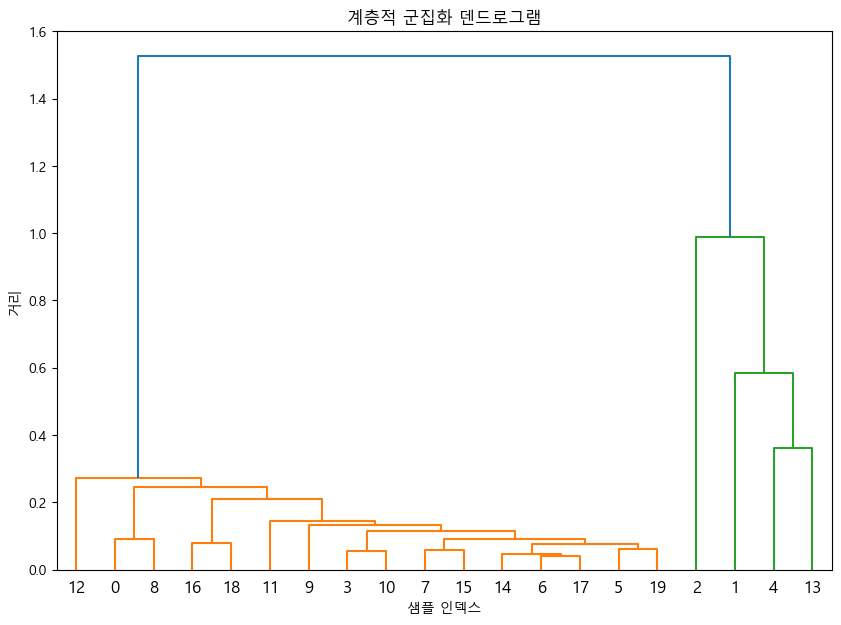


Cluster 0 특징:
포함된 그룹: 가평군, 강북구, 고양시 덕양구, 고양시 일산동구, 고양시 일산서구, 과천시, 관악구, 광명시, 광주시, 광진구, 구리시, 군포시, 금천구, 김포시, 남양주시, 노원구

주요 업종 비율:
식생활비율: 0.1%
식생활의 그룹 내 거래 횟수 평균: 0.6 

소매비율: 0.1%
소매의 그룹 내 거래 횟수 평균: 0.14 

서비스비율: 0.1%
서비스의 그룹 내 거래 횟수 평균: 0.06 

교통_및_물류비율: 0.1%
교통_및_물류의 그룹 내 거래 횟수 평균: 0.06 

의료비율: 0.1%
의료의 그룹 내 거래 횟수 평균: 0.05 

라이프스타일비율: 0.1%
라이프스타일의 그룹 내 거래 횟수 평균: 0.04 

여가비율: 0.1%
여가의 그룹 내 거래 횟수 평균: 0.04 

기타비율: 0.1%
기타의 그룹 내 거래 횟수 평균: 0.01 

교육비율: 0.1%
교육의 그룹 내 거래 횟수 평균: 0.0 

온라인쇼핑비율: 0.1%
온라인쇼핑의 그룹 내 거래 횟수 평균: 0.0 


거래 합산 기준:
식생활의 총 거래 횟수: 10
식생활의 거래 횟수 비율: 59.6%

소매의 총 거래 횟수: 2
소매의 거래 횟수 비율: 14.0%

서비스의 총 거래 횟수: 1
서비스의 거래 횟수 비율: 5.9%

교통_및_물류의 총 거래 횟수: 1
교통_및_물류의 거래 횟수 비율: 5.8%

의료의 총 거래 횟수: 1
의료의 거래 횟수 비율: 5.3%

라이프스타일의 총 거래 횟수: 1
라이프스타일의 거래 횟수 비율: 4.2%

여가의 총 거래 횟수: 1
여가의 거래 횟수 비율: 4.1%

기타의 총 거래 횟수: 0
기타의 거래 횟수 비율: 0.7%

교육의 총 거래 횟수: 0
교육의 거래 횟수 비율: 0.3%

온라인쇼핑의 총 거래 횟수: 0
온라인쇼핑의 거래 횟수 비율: 0.0%


Cluster 1 특징:
포함된 그룹: 구로구

주요 업종 비율:
서비스비율: 0.1%
서비스의 그룹 내 거래 횟수 평균: 0.75 

식생활비율: 0

<Figure size 1200x800 with 0 Axes>

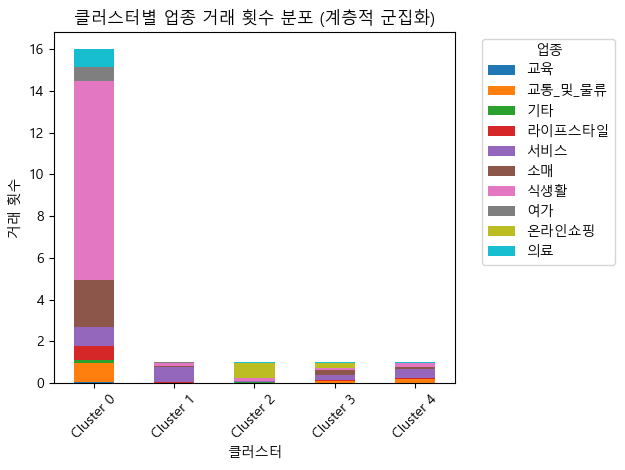

<Figure size 1200x800 with 0 Axes>

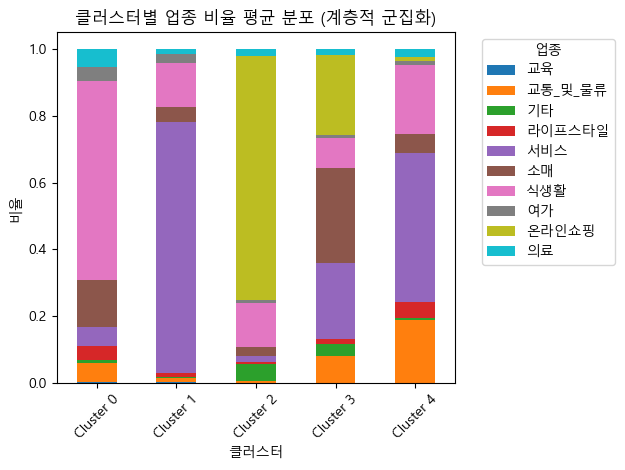

주의: 단 한 항목만 있는 클러스터의 경우 평균이 지나치게 높게 나타날 수 있다.


In [50]:
# 데이터 전처리 - 더 단순하게
grouped_data = data.groupby(['가맹점_시군구', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0).head(20)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) # 비율로 만들거나 아니거나

# 군집 갯수를 조정하기 쉽게 함수화
def perform_hierarchical_clustering(data, n_clusters=2):
    # 계층적 군집화 수행
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = hierarchical.fit_predict(data)
    
    # 덴드로그램 시각화
    plt.figure(figsize=(10, 7))
    linkage_matrix = linkage(data, method='ward', metric='euclidean')
    dendrogram(linkage_matrix)
    plt.title('계층적 군집화 덴드로그램')
    plt.xlabel('샘플 인덱스')
    plt.ylabel('거리')
    plt.show()

    # 클러스터별 평균 계산
    cluster_means = []
    cluster_sums = []
    for i in range(n_clusters):
        cluster_mask = clusters == i
        cluster_data = data[cluster_mask]
        cluster_means.append(cluster_data.mean())
        cluster_sums.append(cluster_data.sum())
        
        cluster_groups = data.index[clusters == i]
        print(f"\nCluster {i} 특징:")
        print(f"포함된 그룹: {', '.join([f'{idx}' for idx in cluster_groups])}")
        print("\n주요 업종 비율:")
        for category, ratio in cluster_means[i].sort_values(ascending=False).items():
            print(f"{category}비율: {ratio_pct:.1%}")
            print(f"{category}의 그룹 내 거래 횟수 평균: {round(ratio, 2)} \n")
            
        print("\n거래 합산 기준:")
        for category, count in cluster_sums[i].sort_values(ascending=False).items():
            print(f"{category}의 총 거래 횟수: {round(count)}")
            print(f"{category}의 거래 횟수 비율: {count/cluster_sums[i].sum():.1%}\n")

    # DataFrame으로 변환
    cluster_means_df = pd.DataFrame(cluster_means, index=[f'Cluster {i}' for i in range(n_clusters)])
    cluster_sums_df = pd.DataFrame(cluster_sums, index=[f'Cluster {i}' for i in range(n_clusters)])

    # Stacked Bar Plot 그리기
    plt.figure(figsize=(12, 8))
    cluster_sums_df.plot(kind='bar', stacked=True)
    plt.title('클러스터별 업종 거래 횟수 분포 (계층적 군집화)')
    plt.xlabel('클러스터')
    plt.ylabel('거래 횟수')
    plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Stacked Bar Plot 그리기
    plt.figure(figsize=(12, 8))
    cluster_means_df.plot(kind='bar', stacked=True)
    plt.title('클러스터별 업종 비율 평균 분포 (계층적 군집화)')
    plt.xlabel('클러스터')
    plt.ylabel('비율')
    plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("주의: 단 한 항목만 있는 클러스터의 경우 평균이 지나치게 높게 나타날 수 있다.")
    
    return clusters, cluster_means_df

# 함수 실행
clusters, cluster_means_df = perform_hierarchical_clustering(grouped_data, n_clusters=5)

### K-means

In [51]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


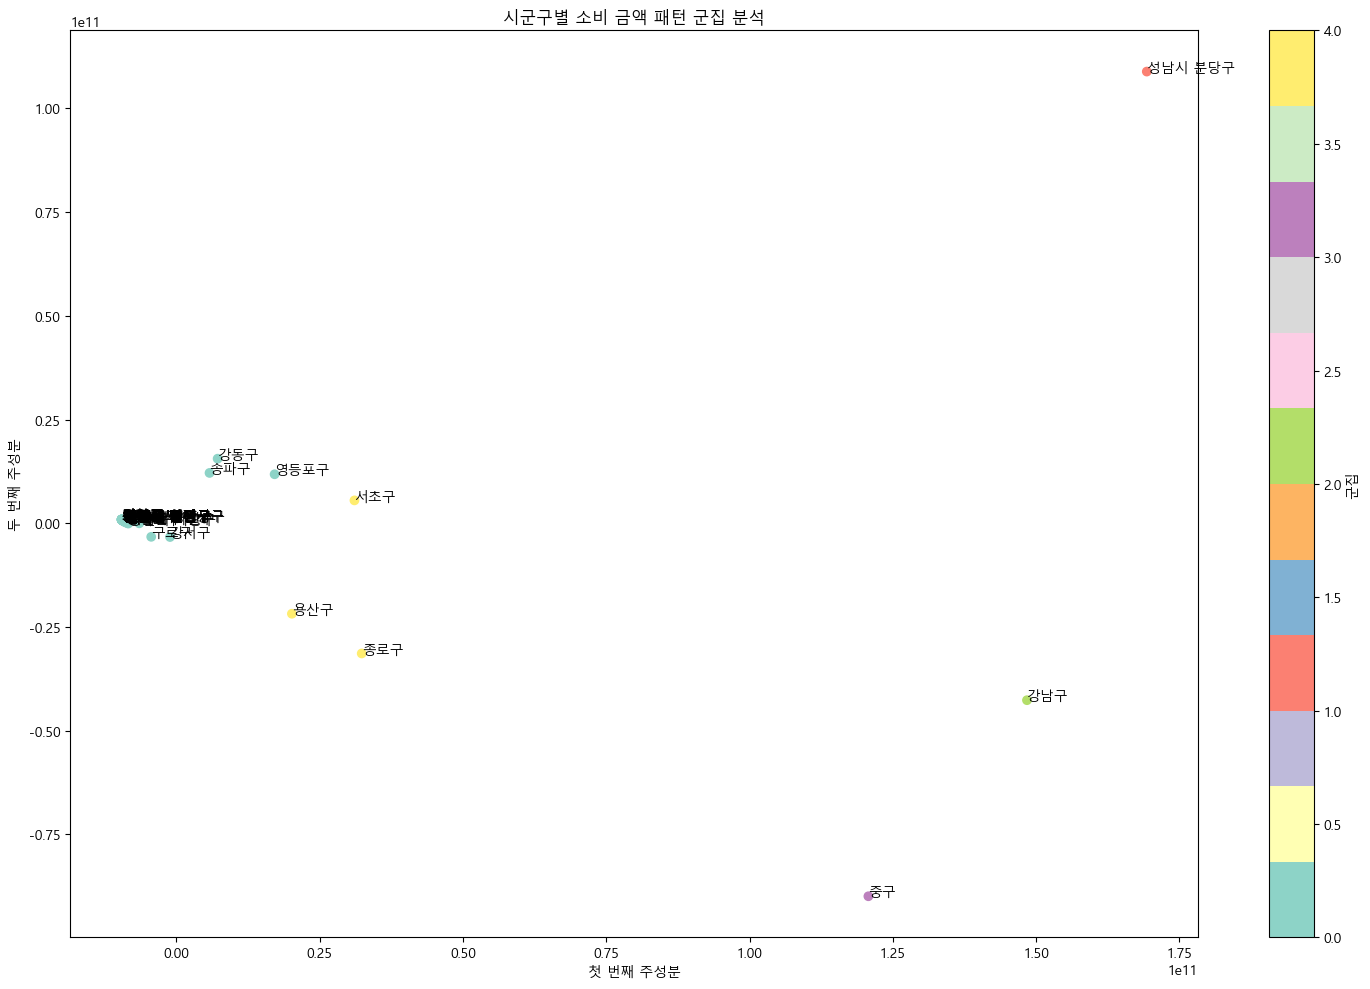


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 시군구: 가평군, 강동구, 강북구, 강서구, 고양시 덕양구, 고양시 일산동구, 고양시 일산서구, 과천시, 관악구, 광명시, 광주시, 광진구, 구로구, 구리시, 군포시, 금천구, 김포시, 남양주시, 노원구, 도봉구, 동대문구, 동두천시, 동작구, 마포구, 부천시, 부천시 소사구, 부천시 오정구, 부천시 원미구, 서대문구, 성남시 수정구, 성남시 중원구, 성동구, 성북구, 송파구, 수원시 권선구, 수원시 영통구, 수원시 장안구, 수원시 팔달구, 시흥시, 안산시 단원구, 안산시 상록구, 안성시, 안양시 동안구, 안양시 만안구, 양주시, 양천구, 양평군, 여주시, 연천군, 영등포구, 오산시, 용인시 기흥구, 용인시 수지구, 용인시 처인구, 은평구, 의왕시, 의정부시, 이천시, 중랑구, 파주시, 평택시, 포천시, 하남시, 화성시

업종별 승인금액 비율:
온라인쇼핑: 112942390625.0%
식생활: 100760484375.0%
서비스: 74652578125.0%
소매: 50387531250.0%
의료: 35516203125.0%
교통_및_물류: 35477015625.0%
라이프스타일: 31080703125.0%
여가: 22304593750.0%
교육: 11406140625.0%
기타: 5875578125.0%
--------------------------------------------------

Cluster 1 특징:
포함된 시군구: 성남시 분당구

업종별 승인금액 비율:
온라인쇼핑: 20194111000000.0%
서비스: 5433866000000.0%
교통_및_물류: 178160000000.0%
식생활: 174950000000.0%
의료: 146258000000.0%
라이프스타일: 128313000000.0%
여가: 105558000000.0%
소매: 57830000000.0%
교육: 18790000000.0%
기타: 11565000000.0%
----------------------

<Figure size 1200x800 with 0 Axes>

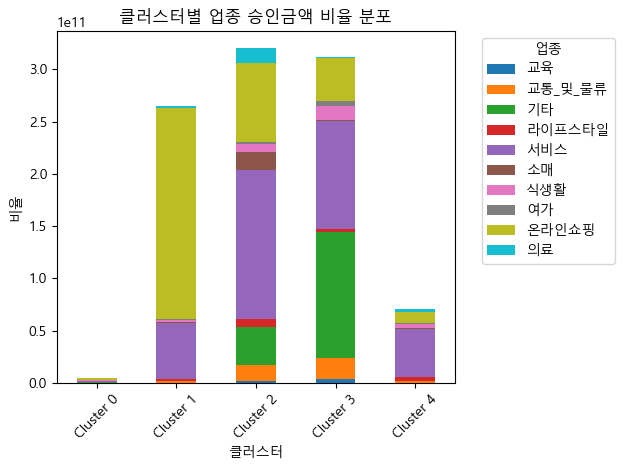

In [52]:
# 서울 내 지역별 소비 금액 비교
# 시군구별 업종별 승인금액 합계 계산
category_sum = data.groupby(['가맹점_시군구', '가맹점업종명_범주화_중분류'])['승인금액'].sum().unstack(fill_value=0)

# 각 시군구별 총 승인금액 대비 업종별 비율 계산
#category_sum = category_sum.div(category_sum.sum(axis=1), axis=0).fillna(0)

def analyze_kmeans_clusters(data, n_clusters=5):
    # K-means 클러스터링 수행
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(category_sum)

    # PCA를 사용하여 2차원으로 차원 축소
    pca = PCA(n_components=2)
    category_ratio_pca = pca.fit_transform(category_sum)

    # ----------------------------------------------------------이하는 시각화 관련 코드

    # 산점도 시각화
    plt.figure(figsize=(15, 10))
    scatter = plt.scatter(category_ratio_pca[:, 0], category_ratio_pca[:, 1], c=clusters, cmap='Set3')
    plt.title('시군구별 소비 금액 패턴 군집 분석')
    plt.xlabel('첫 번째 주성분')
    plt.ylabel('두 번째 주성분')
    plt.colorbar(scatter, label='군집')

    # 각 점에 시군구 이름 표시
    for i, txt in enumerate(category_sum.index):
        plt.annotate(txt, (category_ratio_pca[i, 0], category_ratio_pca[i, 1]))

    plt.tight_layout()
    plt.show()

    # 클러스터별 특징 출력
    print("\n=== 각 클러스터의 특징 ===\n")

    # 군집별 평균 업종 비율 계산
    cluster_means = []
    for i in range(n_clusters):
        cluster_mask = clusters == i
        cluster_data = category_sum[cluster_mask]
        cluster_means.append(cluster_data.mean())

    for i in range(n_clusters):
        print(f"\nCluster {i} 특징:")
        print(f"포함된 시군구: {', '.join(category_sum.index[clusters == i])}")
        print("\n업종별 승인금액 비율:")
        for category, ratio in cluster_means[i].sort_values(ascending=False).items():
            print(f"{category}: {ratio:.1%}")
        print("-" * 50)

    # 클러스터별 업종 비율을 stacked bar plot으로 시각화
    cluster_means_df = pd.DataFrame(cluster_means)
    cluster_means_df.index = [f'Cluster {i}' for i in range(n_clusters)]

    plt.figure(figsize=(12, 8))
    cluster_means_df.plot(kind='bar', stacked=True)
    plt.title('클러스터별 업종 승인금액 비율 분포')
    plt.xlabel('클러스터')
    plt.ylabel('비율')
    plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return clusters, cluster_means_df

# 함수 실행 예시 
clusters, cluster_means_df = analyze_kmeans_clusters(data, n_clusters=5)


- 총금액으로 한 결과는 어째 영 별로다....

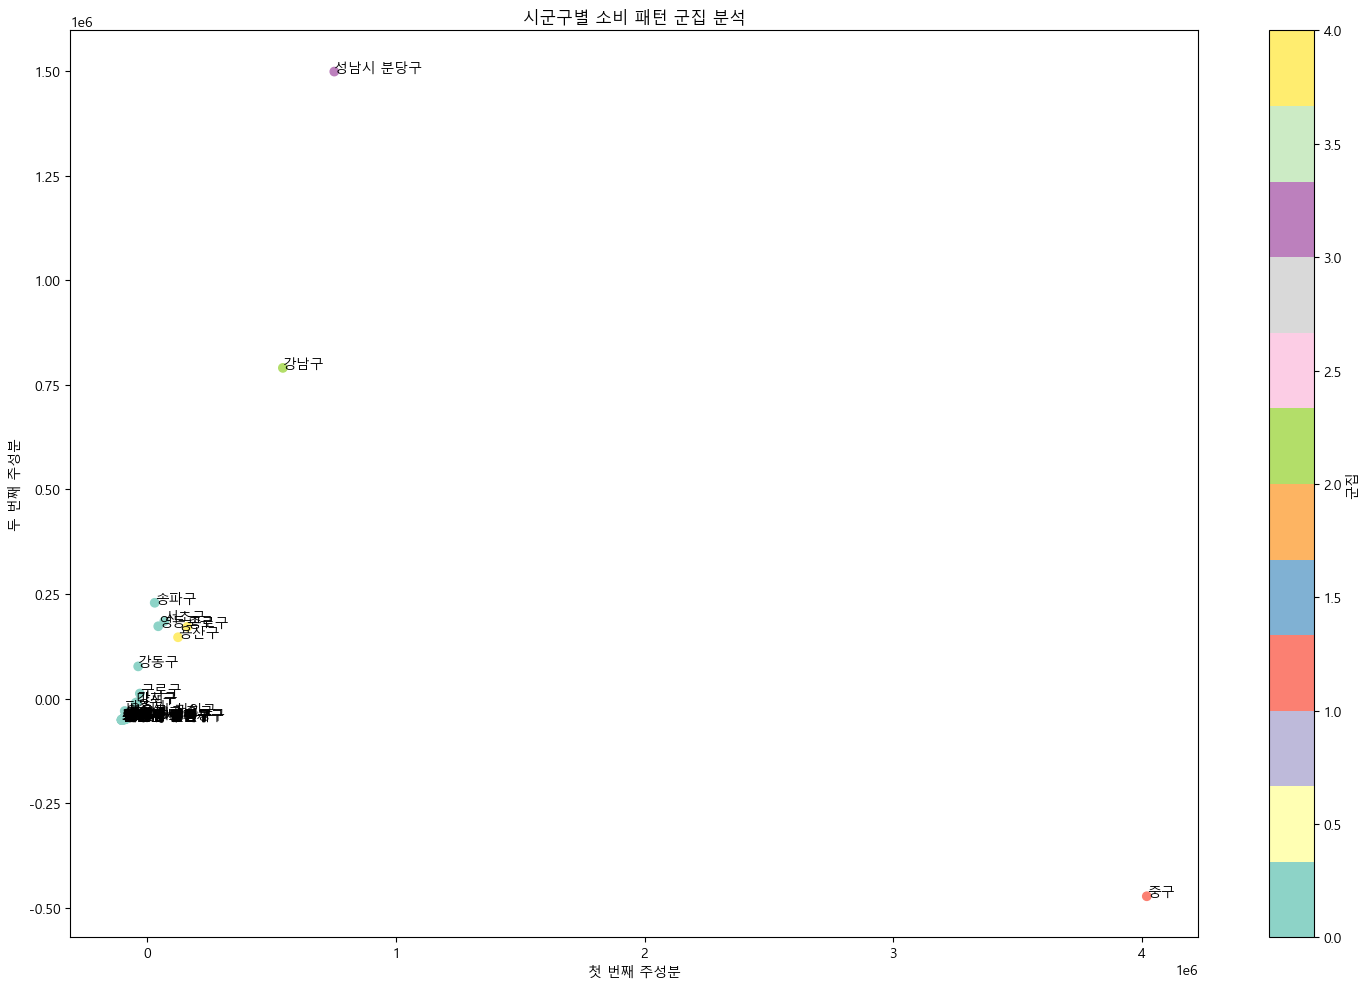


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 시군구: 가평군, 강동구, 강북구, 강서구, 고양시 덕양구, 고양시 일산동구, 고양시 일산서구, 과천시, 관악구, 광명시, 광주시, 광진구, 구로구, 구리시, 군포시, 금천구, 김포시, 남양주시, 노원구, 도봉구, 동대문구, 동두천시, 동작구, 마포구, 부천시, 부천시 소사구, 부천시 오정구, 부천시 원미구, 서대문구, 서초구, 성남시 수정구, 성남시 중원구, 성동구, 성북구, 송파구, 수원시 권선구, 수원시 영통구, 수원시 장안구, 수원시 팔달구, 시흥시, 안산시 단원구, 안산시 상록구, 안성시, 안양시 동안구, 안양시 만안구, 양주시, 양천구, 양평군, 여주시, 연천군, 영등포구, 오산시, 용인시 기흥구, 용인시 수지구, 용인시 처인구, 은평구, 의왕시, 의정부시, 이천시, 중랑구, 파주시, 평택시, 포천시, 하남시, 화성시

주요 업종 비율:
식생활: 3543349.2%
온라인쇼핑: 1573692.3%
서비스: 1230015.4%
소매: 880300.0%
교통_및_물류: 682656.9%
의료: 362736.9%
여가: 315820.0%
라이프스타일: 272612.3%
기타: 63389.2%
교육: 51089.2%
--------------------------------------------------

Cluster 1 특징:
포함된 시군구: 중구

주요 업종 비율:
기타: 357117300.0%
서비스: 152955000.0%
온라인쇼핑: 91652400.0%
교통_및_물류: 87454100.0%
식생활: 69515100.0%
여가: 6466000.0%
라이프스타일: 4955300.0%
교육: 3607300.0%
소매: 2042400.0%
의료: 586300.0%
--------------------------------------------------

Cluster 2 특징:
포함된 시군구: 강남구

주요 업종 비율:
소매: 78460100.0%
온라인쇼핑: 66412600.

<Figure size 1200x800 with 0 Axes>

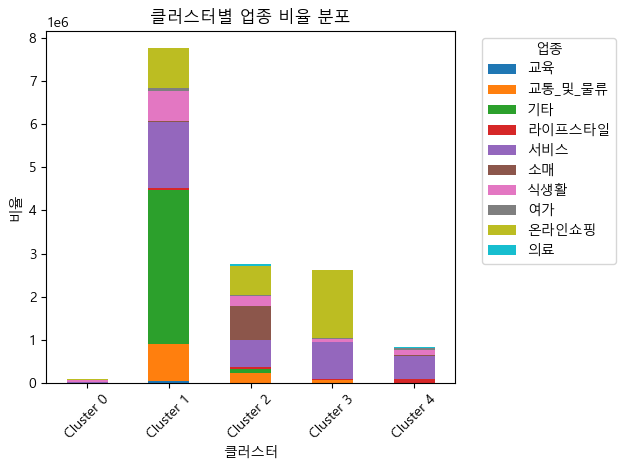

In [53]:
# 서울 내 지역별 소비 비율 비교
# 시군구별 업종 비율 계산
category_ratio = pd.crosstab(data['가맹점_시군구'], data['가맹점업종명_범주화_중분류']) #, normalize='index'

# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(category_ratio)

# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
category_ratio_pca = pca.fit_transform(category_ratio)

# 산점도 시각화
plt.figure(figsize=(15, 10))
scatter = plt.scatter(category_ratio_pca[:, 0], category_ratio_pca[:, 1], c=clusters, cmap='Set3')
plt.title('시군구별 소비 패턴 군집 분석')
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')
plt.colorbar(scatter, label='군집')

# 각 점에 시군구 이름 표시
for i, txt in enumerate(category_ratio.index):
    plt.annotate(txt, (category_ratio_pca[i, 0], category_ratio_pca[i, 1]))

plt.tight_layout()
plt.show()

# 클러스터별 특징 출력
print("\n=== 각 클러스터의 특징 ===\n")

# 군집별 평균 업종 비율 계산
cluster_means = []
for i in range(5):
    cluster_mask = clusters == i
    cluster_data = category_ratio[cluster_mask]
    cluster_means.append(cluster_data.mean())

for i in range(5):
    print(f"\nCluster {i} 특징:")
    print(f"포함된 시군구: {', '.join(category_ratio.index[clusters == i])}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means[i].sort_values(ascending=False).items():
        print(f"{category}: {ratio:.1%}")
    print("-" * 50)

# 클러스터별 업종 비율을 stacked bar plot으로 시각화
cluster_means_df = pd.DataFrame(cluster_means)
cluster_means_df.index = [f'Cluster {i}' for i in range(5)]

plt.figure(figsize=(12, 8))
cluster_means_df.plot(kind='bar', stacked=True)
plt.title('클러스터별 업종 비율 분포')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


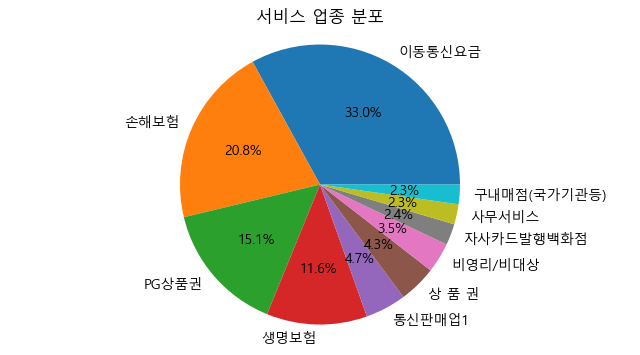

In [54]:
# 서비스 업종 데이터 추출
service_counts = data['가맹점업종명'][data['가맹점업종명_범주화_중분류'] == '서비스'].value_counts().head(10)

# 파이 차트 생성
plt.figure(figsize=(8, 4))
plt.pie(service_counts.values, labels=service_counts.index, autopct='%1.1f%%')
plt.title('서비스 업종 분포')
plt.axis('equal')
plt.show()

## 코드로 원래 데이터에 적용 및 통계분석 (진행중)

In [55]:
# 그룹화 - 나이 및 성별
# 계층적 군집화, GMM, K-means 기반

def age_gender_group(data):
    # 연령대와 성별에 따른 그룹 매핑 딕셔너리 생성
    age_gender_mapping = {
        ('30대', '남'): 'M',
        ('40대', '남'): 'M', 
        ('40대', '여'): 'M',
        ('50대', '남'): 'O',
        ('50대', '여'): 'O',
        ('60대이상', '남'): 'O',
        ('60대이상', '여'): 'O'
    }
    
    # 연령대와 성별 조합으로 그룹 할당
    data['그룹_나이성별'] = data.apply(
        lambda x: age_gender_mapping.get(
            (x['연령대'], x['성별']), 'Y'
        ),
        axis=1
    )
    
    return data

In [56]:
# 그룹화 - 지역
# 그룹이 다양하니 여기선 mapping을 사용하자.
# k-means 기반? 아직 정확하진 않음.
# 아예 지역 그룹은 안 나누는 걸로?

def regional_group(data):

    group1 = [
        '관악구', '광주시', '금천구', '남양주시', '마포구', '부천시', '성동구', '수원시 권선구', '용인시 기흥구', '하남시'
    ]

    group2 = [
        '강서구', '구로구', '용산구', '용인시 처인구', '종로구', '중구'
    ]
        
    group3 = [
        '강동구', '서초구', '성남시 분당구', '송파구', '영등포구'
    ]

    group4 = [
        '강남구', '파주시'
    ]

    group5 = [
        '가평군', '강북구', '고양시 덕양구', '고양시 일산동구', '고양시 일산서구', '과천시', '광명시', '광진구', '구리시', '군포시', '김포시', '노원구', '도봉구', '동대문구', '동두천시', '동작구', '서대문구', '성남시 수정구', '성남시 중원구', '성북구', '수원시 영통구', '수원시 장안구', '수원시 팔달구', '시흥시', '안산시 단원구', '안산시 상록구', '안성시', '안양시 동안구', '안양시 만안구', '양주시', '양천구', '양평군', '여주시', '연천군', '오산시', '용인시 수지구', '은평구', '의왕시', '의정부시', '이천시', '중랑구', '평택시', '포천시', '화성시'
    ]

    # 각 그룹별로 특징을 살려 그룹화

    categorizing_list2 = [group1, group2, group3, group4, group5]
    categorizing_list_name2 = ['그룹_식생활_소매', '그룹_서비스', '그룹_온라인쇼핑', '그룹_소매', '그룹_식생활']

    # 매핑 딕셔너리 생성
    mapping_dict2 = {}
    for i, clist in enumerate(categorizing_list2):
        for item in clist:
            mapping_dict2[item] = categorizing_list_name2[i]

    data['그룹_지역'] = data['가맹점_시군구'].map(mapping_dict2)

    return data

    # 범주화 떄 사용했던 것처럼 ampping을 활용한다.

In [57]:
data = age_gender_group(data)
data = regional_group(data)

MemoryError: Unable to allocate 2.77 GiB for an array with shape (18, 20652592) and data type object

# 통계분석

- 그룹화 된 것들의 비율을 중심으로 분석
- 제대로 그룹화가 되었는가?를 검증하기 위함

- 나이그룹 그룹화 
    - A: 30대-여, 40대-남, 40대-여
    - B: 50대-남, 50대-여, 60대이상-남, 60대이상-여
    - C: 10대-남, 10대-여, 20대-남, 20대-여, 30대-남

### 카이제곱 및 사후분석



In [61]:
from scipy import stats
from scipy.stats import chi2
from itertools import combinations
from statsmodels.stats.multitest import multipletests

In [62]:
def chi_square(list):
    # 카이제곱 검정 수행
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(list)

    # 결과 출력
    print(f"카이제곱 통계량: {chi2_stat:.3f}")
    print(f"P-value: {p_value:.3f}")
    print(f"자유도: {dof}")
    print("기대 빈도:\n", expected)

    # 유의수준 0.05에서 검정 결과
    if p_value < 0.05:
        print("귀무가설 기각: 집단 간 분포에 차이가 있습니다.")
    else:
        print("귀무가설 채택: 집단 간 분포에 차이가 없습니다.")

In [63]:
# 카이제곱 사후 검정을 위한 함수 정의
def post_hoc_chi_square(data, alpha=0.05):

    n_cols = len(data.columns)
    results = []
    
    # 모든 가능한 쌍에 대해 카이제곱 검정 수행
    for i in range(n_cols):
        for j in range(i+1, n_cols):
            col1, col2 = data.columns[i], data.columns[j]
            contingency = pd.DataFrame({
                col1: data[col1],
                col2: data[col2]
            })
            
            chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency)
            results.append({
                'Group 1': col1,
                'Group 2': col2,
                'Chi-square': chi2_stat,
                'p-value': p_value
            })
    
    # 결과를 데이터프레임으로 변환
    results_df = pd.DataFrame(results)
    
    # Bonferroni 교정 - 유의수준에 변화가 일어난다.
    n_tests = len(results)
    results_df['Significant'] = results_df['p-value'] < (alpha / n_tests)
    
    return results_df

In [122]:
# 지역별로 그룹 만드는 함수 - HEATMAP 출력까지 해 보자


# 나이성별 그룹 별 
agender_group_Y = data['가맹점업종명_범주화_중분류'][data['그룹_나이성별'] == 'Y'].value_counts().sort_index()
agender_group_M = data['가맹점업종명_범주화_중분류'][data['그룹_나이성별'] == 'M'].value_counts().sort_index()
agender_group_O = data['가맹점업종명_범주화_중분류'][data['그룹_나이성별'] == 'O'].value_counts().sort_index()

# 교차표 생성
agender_group_total = pd.concat([agender_group_Y, agender_group_M, agender_group_O], axis=1).fillna(0)
agender_group_total.columns = ['Y', 'M', 'O']

def get_regional_data(area):
    # 데이터 먼저 area로 해당 지역만 출력
    area_data = fixed_data[fixed_data['가맹점_시군구'] == area]

    # 나이성별 그룹 별 
    agender_group_Y2 = area_data['가맹점업종명_범주화_중분류'][area_data['그룹_나이성별'] == 'Y'].value_counts().sort_index()
    agender_group_M2 = area_data['가맹점업종명_범주화_중분류'][area_data['그룹_나이성별'] == 'M'].value_counts().sort_index()
    agender_group_O2 = area_data['가맹점업종명_범주화_중분류'][area_data['그룹_나이성별'] == 'O'].value_counts().sort_index()

    # 교차표 생성
    agender_group_total2 = pd.concat([agender_group_Y2, agender_group_M2, agender_group_O2], axis=1).fillna(0)
    agender_group_total2.columns = ['Y', 'M', 'O']
    
    # 비율로 바꾸기
    agender_group_total2_norm = agender_group_total2.div(agender_group_total2.sum(axis=0), axis=1).round(4)

    # 히트맵 그리기
    
    # 총합 계산
    totals = agender_group_total2.sum()
    
    # 히트맵 그리기 (총합 제외)
    plt.figure(figsize=(10, 6))
    sns.heatmap(agender_group_total2, cmap='YlGn', annot=True, fmt='.0f')
    plt.title(f'{area}의 나이성별 그룹별 Heatmap')
    
    # 총합을 별도로 표시
    plt.figure(figsize=(10, 1))
    sns.heatmap(pd.DataFrame(totals).T, cmap='YlGn', annot=True, fmt='.0f')
    plt.title('총합')
    return agender_group_total2, agender_group_total2_norm



(                   Y     M     O
 가맹점업종명_범주화_중분류                  
 교육                17    33    16
 교통_및_물류         2269   977  1608
 라이프스타일           206   236   481
 서비스             2259  4367  7308
 소매              3507  4928  8867
 식생활             2030  1409  1771
 여가               237    96    86
 의료               226   208   602,
                      Y       M       O
 가맹점업종명_범주화_중분류                        
 교육              0.0016  0.0027  0.0008
 교통_및_물류         0.2111  0.0797  0.0775
 라이프스타일          0.0192  0.0193  0.0232
 서비스             0.2101  0.3564  0.3524
 소매              0.3262  0.4022  0.4276
 식생활             0.1888  0.1150  0.0854
 여가              0.0220  0.0078  0.0041
 의료              0.0210  0.0170  0.0290)

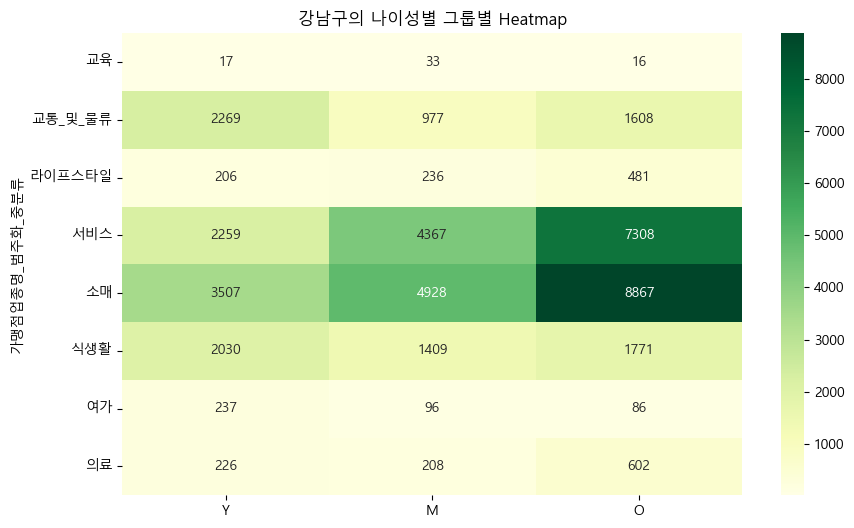

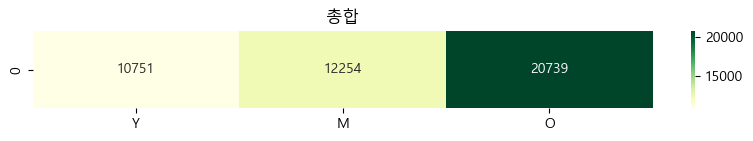

In [123]:
get_regional_data('강남구')

In [67]:
# 카이제곱 검정 수행
chi_square(agender_group_total)

# 사후 검정 수행
post_hoc_results = post_hoc_chi_square(agender_group_total)
print("\n사후 검정 결과:")
print(post_hoc_results.sort_values('p-value'))

카이제곱 통계량: 46283.147
P-value: 0.000
자유도: 18
기대 빈도:
 [[  399.07435866   379.49688484   588.4287565 ]
 [10075.53280208  9581.25529376 14856.21190415]
 [24156.98978086 22971.91530868 35619.09491046]
 [ 2737.46910107  2603.17651     4036.35438893]
 [31411.56023639 29870.59679247 46315.84297114]
 [ 8733.80218584  8305.34623543 12877.85157872]
 [22301.74651145 21207.68509421 32883.56839434]
 [ 2137.54385817  2032.68192452  3151.77421732]
 [27359.21848616 26017.05161434 40340.7298995 ]
 [ 1840.06267932  1749.79434174  2713.14297893]]
귀무가설 기각: 집단 간 분포에 차이가 있습니다.

사후 검정 결과:
  Group 1 Group 2    Chi-square  p-value  Significant
0       Y       M   7692.411538      0.0         True
1       Y       O  41511.894942      0.0         True
2       M       O  15864.825768      0.0         True


In [53]:
service = data['가맹점업종명_범주화_중분류'][data['그룹_지역'] == '그룹_서비스'].value_counts().sort_index() # '강서구', '구로구', '용산구', '용인시 처인구', '종로구', '중구'
shopping = data['가맹점업종명_범주화_중분류'][data['그룹_지역'] == '그룹_온라인쇼핑'].value_counts().sort_index()
retail = data['가맹점업종명_범주화_중분류'][data['그룹_지역'] == '그룹_소매'].value_counts().sort_index()
food = data['가맹점업종명_범주화_중분류'][data['그룹_지역'] == '그룹_식생활'].value_counts().sort_index()
food_retail = data['가맹점업종명_범주화_중분류'][data['그룹_지역'] == '그룹_식생활_소매'].value_counts().sort_index()

# 교차표 생성
g_total = pd.concat([service, shopping, retail, food, food_retail], axis=1).fillna(0)
g_total.columns = ['service', 'shopping', 'retail', 'food', 'food_retail']

chi_square(g_total)

post_g_total = post_hoc_chi_square(g_total)
print(post_g_total.sort_values('p-value'))

카이제곱 통계량: 346339.606
P-value: 0.000
자유도: 36
기대 빈도:
 [[  674.31830475   314.51452071   197.44524379   125.16316569
     55.55876507]
 [17024.68738244  7940.62886111  4984.95076738  3160.02658179
   1402.70640727]
 [40818.20854526 19038.36690521 11951.86469154  7576.44596499
   3363.113893  ]
 [ 4625.51773492  2157.42696464  1354.38482154   858.56254911
    381.10792979]
 [53076.29916195 24755.76693415 15541.12168368  9851.72370257
   4373.08851766]
 [14757.55722251  6883.19745134  4321.11876996  2739.21465092
   1215.91190527]
 [37683.39301733 17576.23100244 11033.96818511  6994.57916328
   3104.82863185]
 [ 3611.82050283  1684.61983951  1057.56698979   670.40577846
    297.58688941]
 [46229.03333296 21562.07559404 13536.19305962  8580.77278606
   3808.92522732]
 [ 3109.16479505  1450.17192686   910.38578758   577.10565714
    256.17183337]]
귀무가설 기각: 집단 간 분포에 차이가 있습니다.
    Group 1      Group 2     Chi-square  p-value  Significant
0   service     shopping  102409.194245      0.0         

# 미표본 모비율 검정

In [1]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
def two_sample_proportion_test(data1, data2, n1, n2):
    """
    이표본 모비율 검정을 수행하는 함수
    
    Parameters:
    data1: 첫 번째 집단의 성공 횟수 배열
    data2: 두 번째 집단의 성공 횟수 배열
    n1: 첫 번째 집단의 전체 표본 수
    n2: 두 번째 집단의 전체 표본 수
    """
    
    results = []
    
    # 각 카테고리별로 검정 수행
    for i in range(len(data1)):
        # 각 집단의 비율 계산
        p1 = data1[i]/n1
        p2 = data2[i]/n2
        
        # 통합 비율 계산
        p = (data1[i] + data2[i])/(n1 + n2)
        
        # 표준오차 계산
        se = np.sqrt(p*(1-p)*(1/n1 + 1/n2))
        
        # Z 통계량 계산
        z_stat = (p1 - p2)/se
        
        # p-value 계산 (양측검정)
        p_value = 2*(1 - stats.norm.cdf(abs(z_stat)))
        
        results.append({
            '비율1': p1,
            '비율2': p2,
            '비율차이': p1-p2,
            'Z통계량': z_stat,
            'p값': p_value
        })
    
    return pd.DataFrame(results, index=agender_group_total.index)

# 결과 출력
result = two_sample_proportion_test(dat_o, dat_y, n1, n2)

print("\n=== 이표본 모비율 검정 결과 ===")
print(result)

# 유의수준 0.05에서 검정 결과 해석
significant_categories = result[result['p값'] < 0.05]
print("\n유의한 차이가 있는 카테고리:")
print(significant_categories)

# -----------------------------------

## 이 밑으론 굳이 보지 않아도 됨


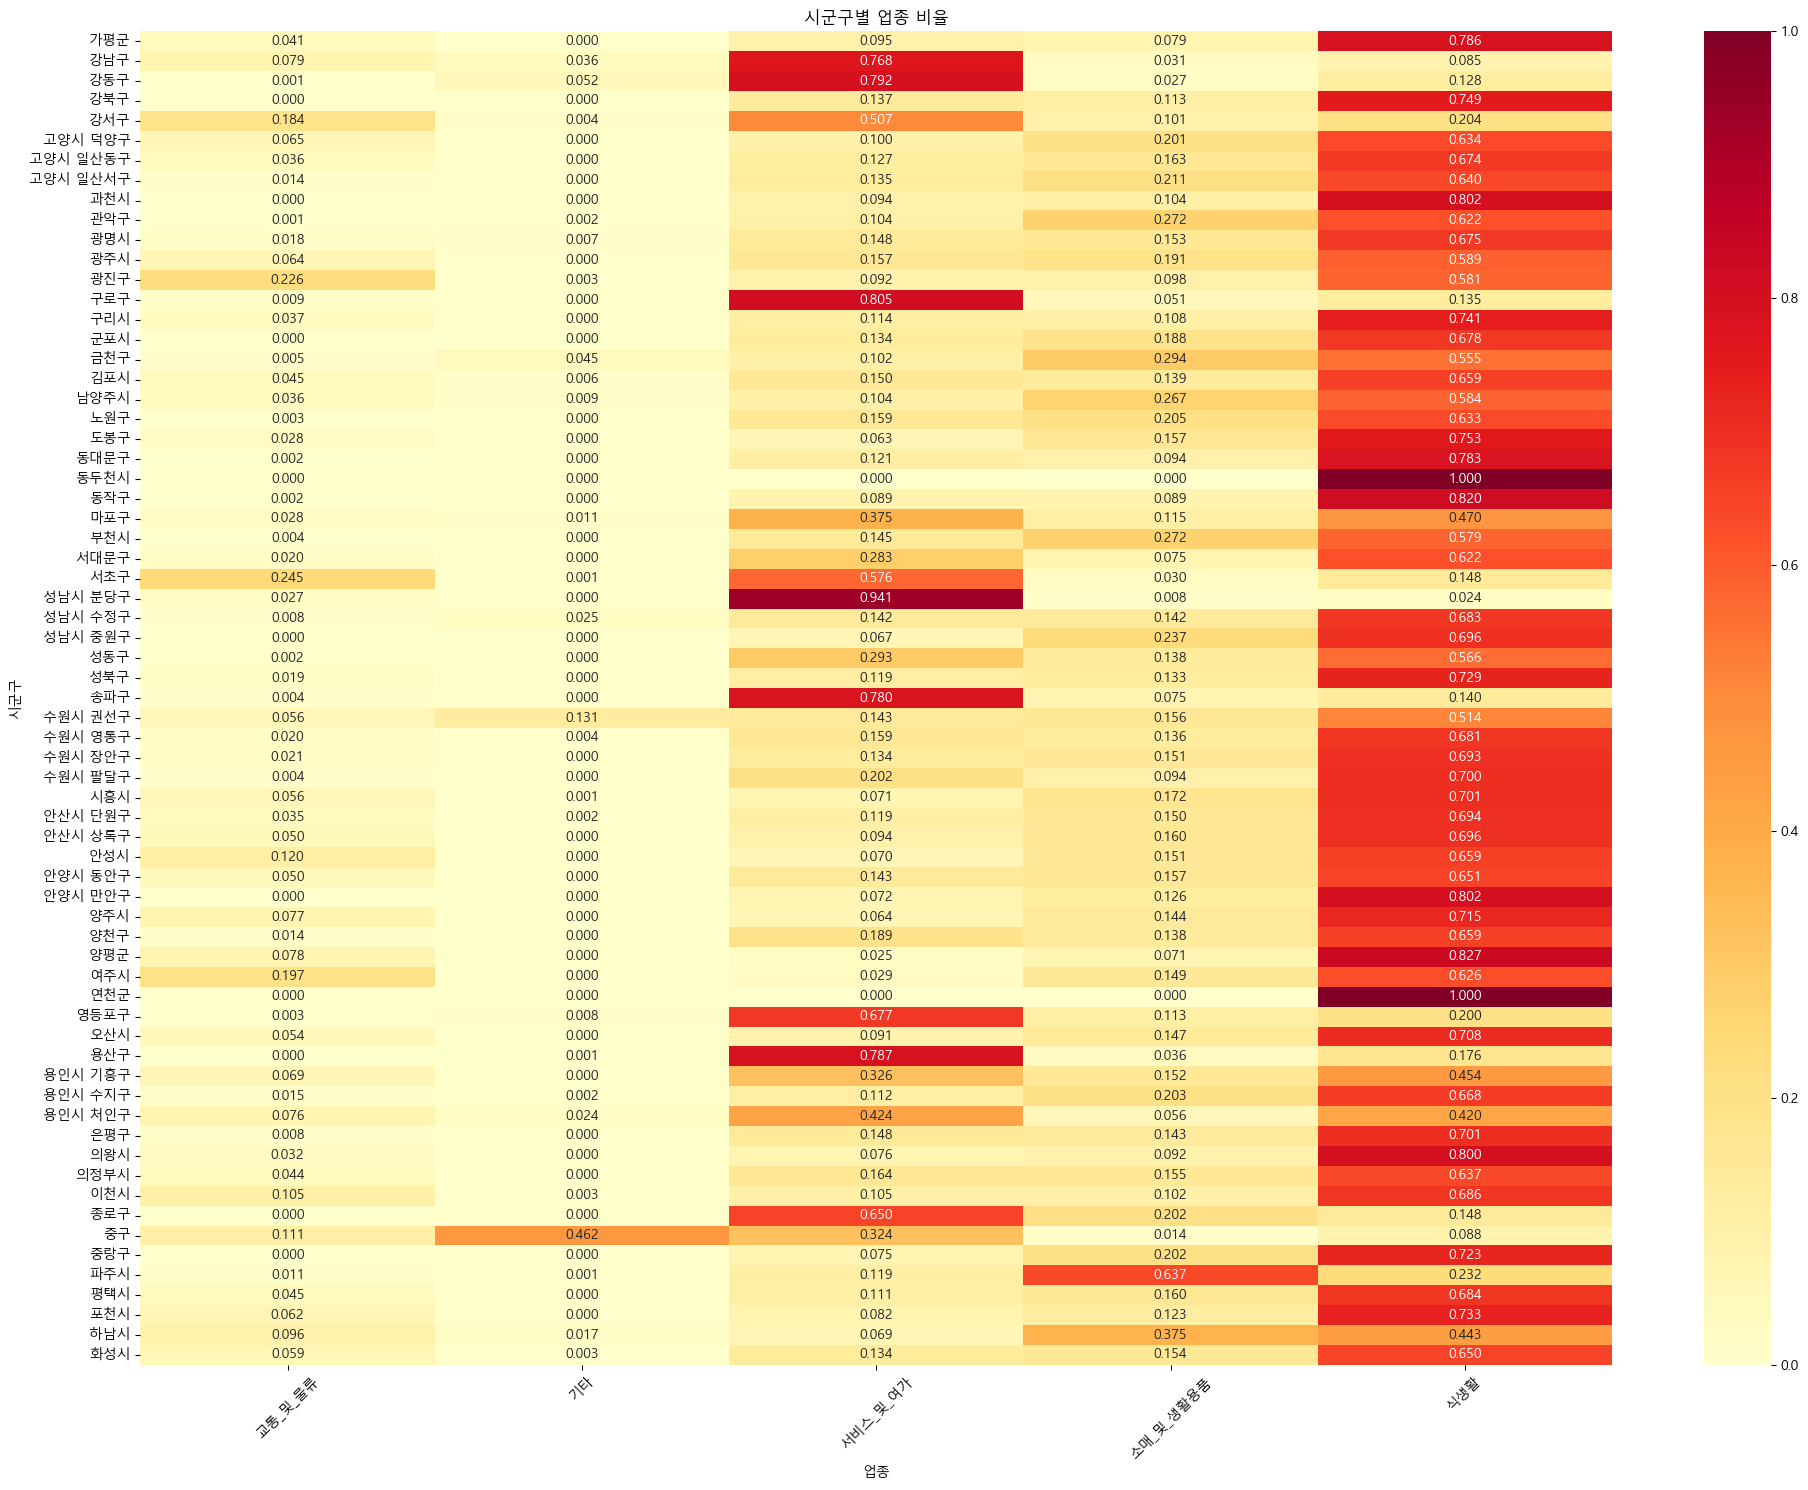


=== 군집별 시군구 ===

군집 0:
['관악구', '광주시', '금천구', '남양주시', '마포구', '부천시', '성동구', '수원시 권선구', '용인시 기흥구', '용인시 처인구', '파주시', '하남시']

군집 1:
['강남구', '강동구', '강서구', '구로구', '서초구', '성남시 분당구', '송파구', '영등포구', '용산구', '종로구', '중구']

군집 2:
['가평군', '강북구', '고양시 덕양구', '고양시 일산동구', '고양시 일산서구', '과천시', '광명시', '광진구', '구리시', '군포시', '김포시', '노원구', '도봉구', '동대문구', '동두천시', '동작구', '서대문구', '성남시 수정구', '성남시 중원구', '성북구', '수원시 영통구', '수원시 장안구', '수원시 팔달구', '시흥시', '안산시 단원구', '안산시 상록구', '안성시', '안양시 동안구', '안양시 만안구', '양주시', '양천구', '양평군', '여주시', '연천군', '오산시', '용인시 수지구', '은평구', '의왕시', '의정부시', '이천시', '중랑구', '평택시', '포천시', '화성시']


C:\Users\campus3S031\AppData\Local\Temp\ipykernel_97624\1809124373.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(cluster_means[i].index, rotation=45)
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_97624\1809124373.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(cluster_means[i].index, rotation=45)
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_97624\1809124373.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(cluster_means[i].index, rotation=45)


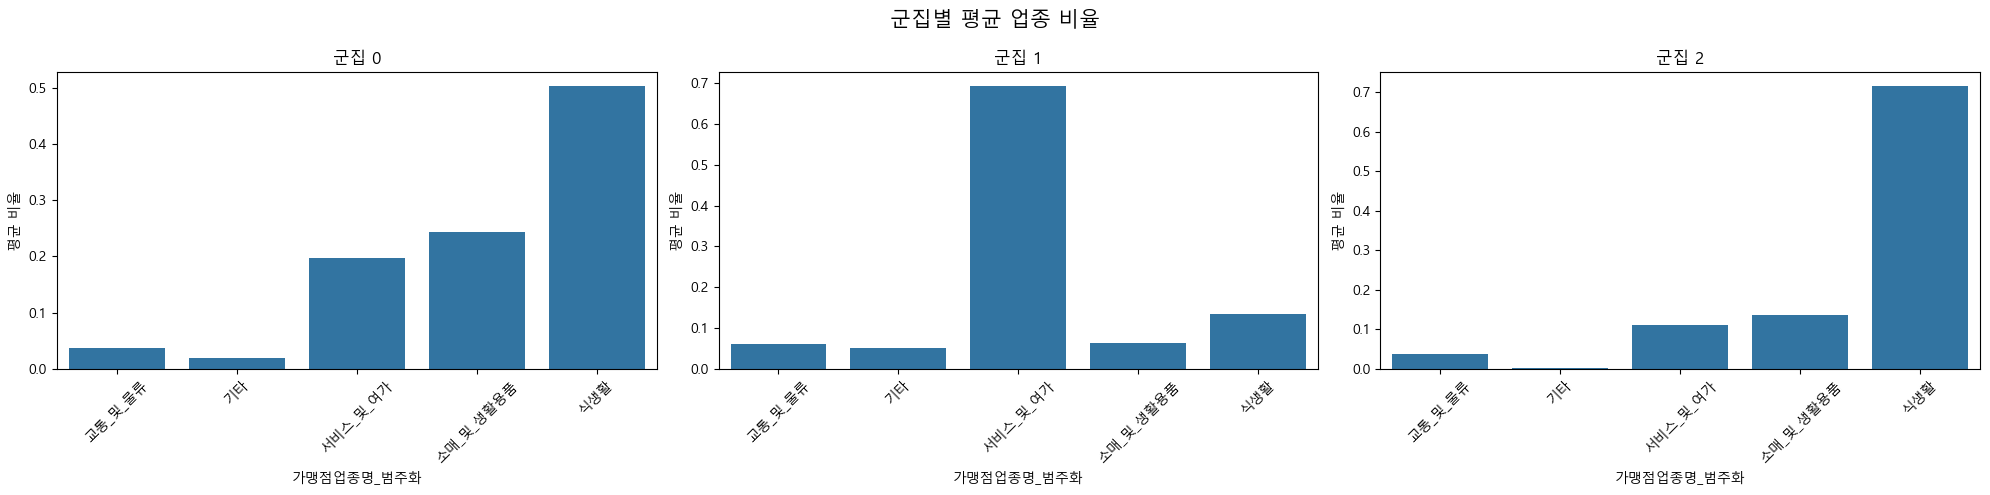

In [56]:
# 서울 내 지역별 소비 비율 비교
# 시군구별 업종 비율 계산
category_ratio = pd.crosstab(data['가맹점_시군구'], data['가맹점업종명_범주화'], normalize='index')

# 시각화
plt.figure(figsize=(20, 15))
sns.heatmap(category_ratio, cmap='YlOrRd', annot=True, fmt='.3f')
plt.title('시군구별 업종 비율')
plt.xlabel('업종')
plt.ylabel('시군구')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# K-means 클러스터링으로 3개 그룹으로 분류
from sklearn.cluster import KMeans

# 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(category_ratio)

# 결과 출력
category_ratio['군집'] = clusters
print("\n=== 군집별 시군구 ===")
for i in range(3):
    print(f"\n군집 {i}:")
    print(category_ratio[category_ratio['군집']==i].index.tolist())

# 군집별 평균 업종 비율 계산
cluster_means = []
for i in range(3):
    cluster_data = category_ratio[category_ratio['군집']==i].drop('군집', axis=1)
    cluster_means.append(cluster_data.mean())

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('군집별 평균 업종 비율', fontsize=15)

for i in range(3):
    sns.barplot(x=cluster_means[i].index, y=cluster_means[i].values, ax=axes[i])
    axes[i].set_title(f'군집 {i}')
    axes[i].set_xticklabels(cluster_means[i].index, rotation=45)
    axes[i].set_ylabel('평균 비율')

plt.tight_layout()
plt.show()



# 지역 그룹화 및 클러스터링
- 지역 위주의 EDA

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449255 entries, 0 to 841275
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      449255 non-null  int64  
 1   거래년월            449255 non-null  object 
 2   고객ID            449255 non-null  int64  
 3   가맹점업종명          449255 non-null  object 
 4   가맹점_광역시도        449255 non-null  object 
 5   가맹점_시군구         449255 non-null  object 
 6   승인건수            449255 non-null  object 
 7   승인금액            449255 non-null  int64  
 8   연령대             449255 non-null  object 
 9   성별              449255 non-null  object 
 10  고객등급            449255 non-null  object 
 11  자택_시도           449255 non-null  object 
 12  자택_시군구          449255 non-null  object 
 13  승인건수_수치화        449255 non-null  int64  
 14  거래년월_분기         449255 non-null  int64  
 15  거래월             449255 non-null  object 
 16  년도              449255 non-null  int64  
 17  가맹점업종명_범주화     

# 차원축소 - 폐기 - 
- 지역별 소비 비율은 카이제곱으로
- 지역별 분류 및 클러스터링
- 분류 기준을 잡자

- PCA는 연속형 특화라 적용이 어려움
    - 따라서 찾은 방법은 T-sne => Umap => PacMap 
    - 순서대로 더 진보한 방법이라고 볼 수 있다.

- 그러나 차원축소 기법은 원래 고차원 데이터에 사용하기 위한 알고리즘으로, 시군구같이 데이터가 몇 십개에 불과한 경우 오히려 해석이 어렵고 과적합의 위험까지 있다.

### T-sne 차원축소 및 시각화 진행
- 가맹점 범주화를 기준으로 업종당 결제 비중이 비슷한 지역끼리 Clustering

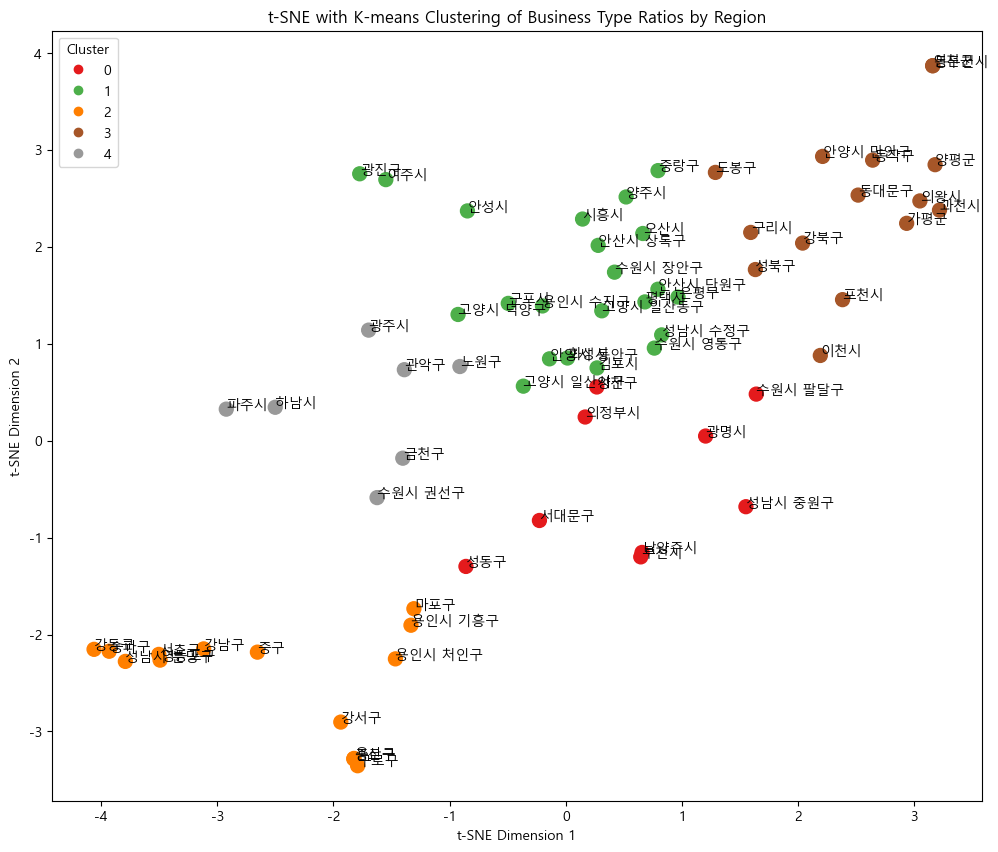


각 클러스터별 구성 시군구:

클러스터 0의 시군구:
['광명시', '남양주시', '부천시', '서대문구', '성남시 중원구', '성동구', '수원시 팔달구', '양천구', '의정부시']

클러스터 1의 시군구:
['고양시 덕양구', '고양시 일산동구', '고양시 일산서구', '광진구', '군포시', '김포시', '성남시 수정구', '수원시 영통구', '수원시 장안구', '시흥시', '안산시 단원구', '안산시 상록구', '안성시', '안양시 동안구', '양주시', '여주시', '오산시', '용인시 수지구', '은평구', '중랑구', '평택시', '화성시']

클러스터 2의 시군구:
['강남구', '강동구', '강서구', '구로구', '마포구', '서초구', '성남시 분당구', '송파구', '영등포구', '용산구', '용인시 기흥구', '용인시 처인구', '종로구', '중구']

클러스터 3의 시군구:
['가평군', '강북구', '과천시', '구리시', '도봉구', '동대문구', '동두천시', '동작구', '성북구', '안양시 만안구', '양평군', '연천군', '의왕시', '이천시', '포천시']

클러스터 4의 시군구:
['관악구', '광주시', '금천구', '노원구', '수원시 권선구', '파주시', '하남시']


각 클러스터별 평균 업종 비율:


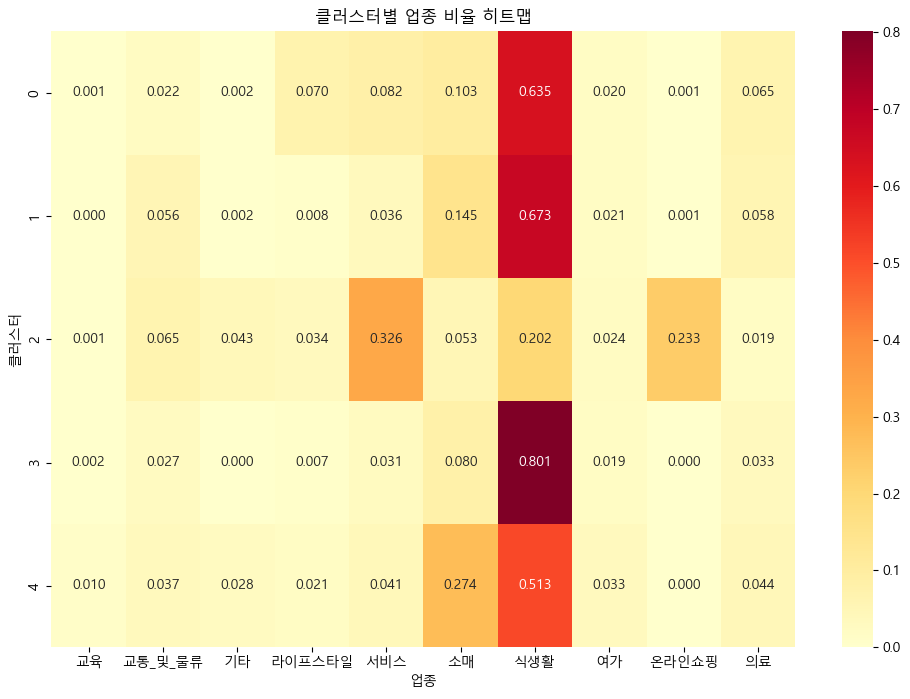

In [58]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# 인터넷P/G를 빼야 할 것 같지만 일단은 넣어서 진행해보자.

dat_sne = data[['가맹점_시군구','가맹점업종명_범주화_중분류']]

# 시군구별 가맹점업종명_범주화 비율 계산
grouped_data = data.groupby(['가맹점_시군구', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환

# t-SNE를 사용하여 차원 축소
tsne = TSNE(n_components=2, random_state=42) #차원을 2개로 축소
tsne_result = tsne.fit_transform(grouped_data)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=5, random_state=42)  # 군집 개수 조정 가능
grouped_data['Cluster'] = kmeans.fit_predict(tsne_result)

# t-SNE 결과를 데이터프레임에 추가
grouped_data['t-SNE_1'] = tsne_result[:, 0]
grouped_data['t-SNE_2'] = tsne_result[:, 1]

# 시각화
plt.figure(figsize=(12, 10))
scatter = plt.scatter(
    grouped_data['t-SNE_1'], 
    grouped_data['t-SNE_2'],
    c=grouped_data['Cluster'],
    cmap='Set1',
    s=100
)

# 각 점에 시군구 이름 표시
for idx, row in grouped_data.iterrows():
    plt.annotate(idx, (row['t-SNE_1'], row['t-SNE_2']))

plt.title('t-SNE with K-means Clustering of Business Type Ratios by Region')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()

# 각 클러스터의 구성 시군구와 평균 업종 비율 출력
print("\n각 클러스터별 구성 시군구:")
for cluster in range(5):
    print(f"\n클러스터 {cluster}의 시군구:")
    print(grouped_data[grouped_data['Cluster'] == cluster].index.tolist())
    
# 시각화 - 히트맵 사용
print("\n\n각 클러스터별 평균 업종 비율:")
cluster_means = grouped_data.groupby('Cluster')[['교육','교통_및_물류', '기타', '라이프스타일', '서비스', '소매', '식생활', '여가', '온라인쇼핑', '의료']].mean()
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.round(3), annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('클러스터별 업종 비율 히트맵')
plt.xlabel('업종')
plt.ylabel('클러스터')
plt.show()

### Umap을 적용해볼 수 있을까?
- 결과가 엄청나게 유의하지는 않을 듯 하다

In [59]:
#pip install umap-learn -qq
#!pip install numpy==2.0 -qq

In [60]:
import umap
from sklearn.cluster import KMeans

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# UMAP 적용으로 데이터 그룹화

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


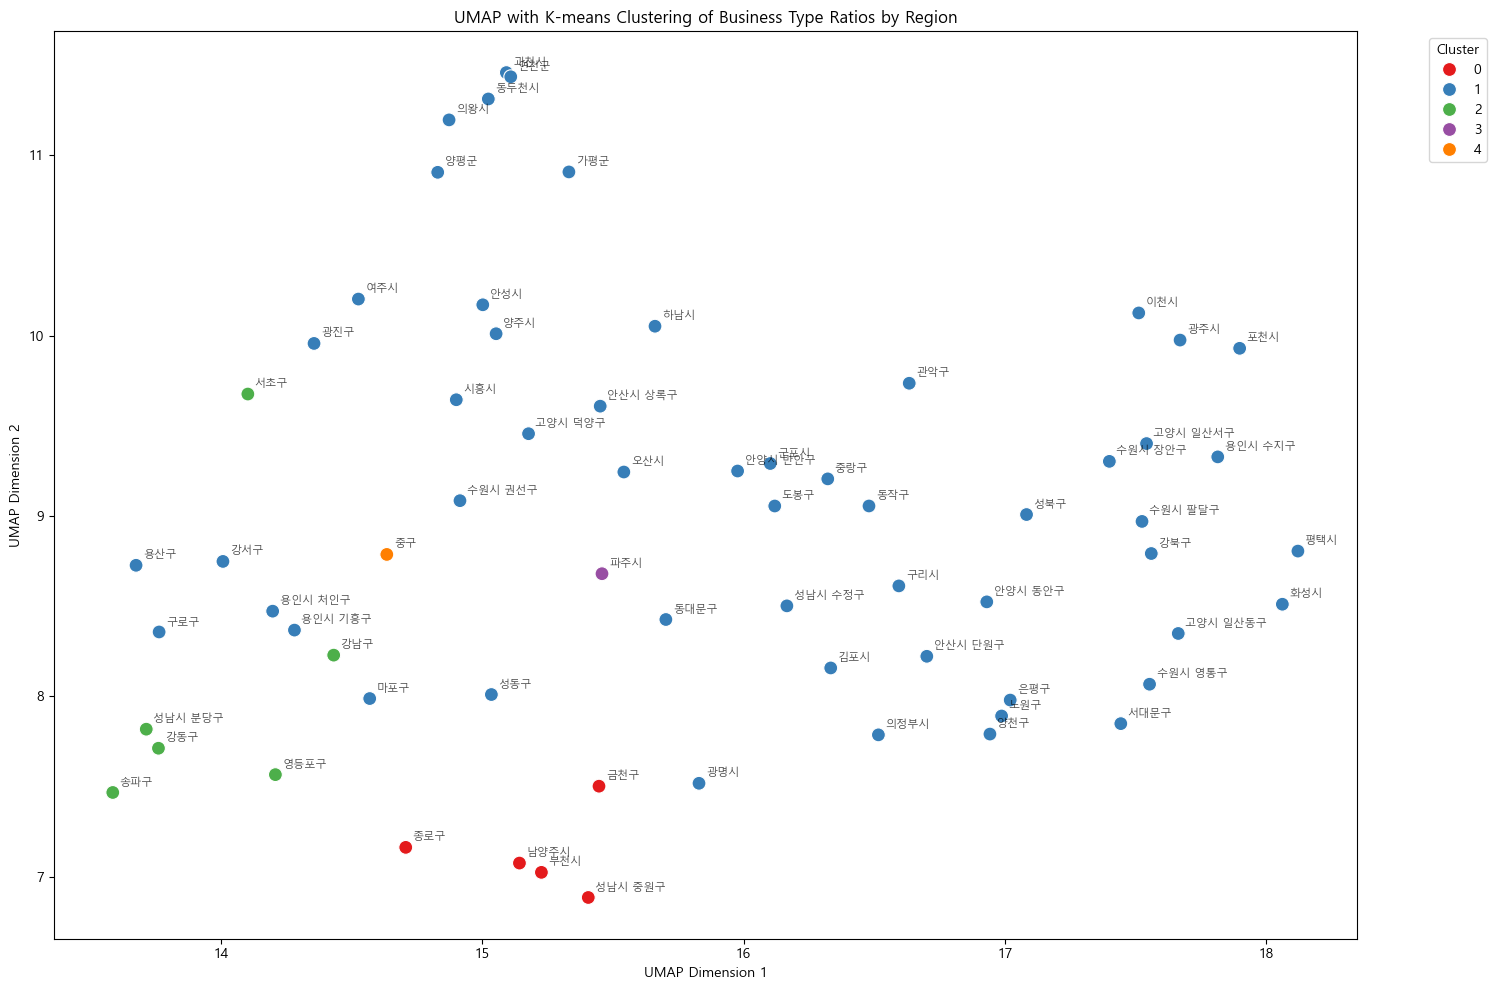


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 지역 수: 5

주요 업종 비율:
식생활: 51.2%
서비스: 15.8%
라이프스타일: 14.8%
소매: 11.0%
의료: 3.4%
교통_및_물류: 1.4%
여가: 1.3%
기타: 1.1%
온라인쇼핑: 0.0%
교육: 0.0%

대표적인 지역:
금천구, 남양주시, 부천시, 성남시 중원구, 종로구
--------------------------------------------------

Cluster 1 특징:
포함된 지역 수: 54

주요 업종 비율:
식생활: 65.4%
소매: 11.9%
서비스: 9.0%
의료: 4.8%
교통_및_물류: 4.5%
여가: 2.3%
라이프스타일: 1.2%
기타: 0.5%
온라인쇼핑: 0.3%
교육: 0.1%

대표적인 지역:
가평군, 강북구, 강서구, 고양시 덕양구, 고양시 일산동구
--------------------------------------------------

Cluster 2 특징:
포함된 지역 수: 6

주요 업종 비율:
온라인쇼핑: 50.2%
서비스: 16.5%
식생활: 12.1%
교통_및_물류: 6.8%
소매: 6.4%
여가: 2.3%
라이프스타일: 2.1%
의료: 2.0%
기타: 1.6%
교육: 0.1%

대표적인 지역:
강남구, 강동구, 서초구, 성남시 분당구, 송파구
--------------------------------------------------

Cluster 3 특징:
포함된 지역 수: 1

주요 업종 비율:
소매: 63.2%
식생활: 23.3%
교육: 7.0%
의료: 1.8%
서비스: 1.7%
여가: 1.5%
교통_및_물류: 1.1%
라이프스타일: 0.1%
기타: 0.1%
온라인쇼핑: 0.0%

대표적인 지역:
파주시
--------------------------------------------------

Cluster 4 특징:
포함된 지역 수: 1

주요 업종 비율:
기타: 46.2%
서비스: 19.8%
온라

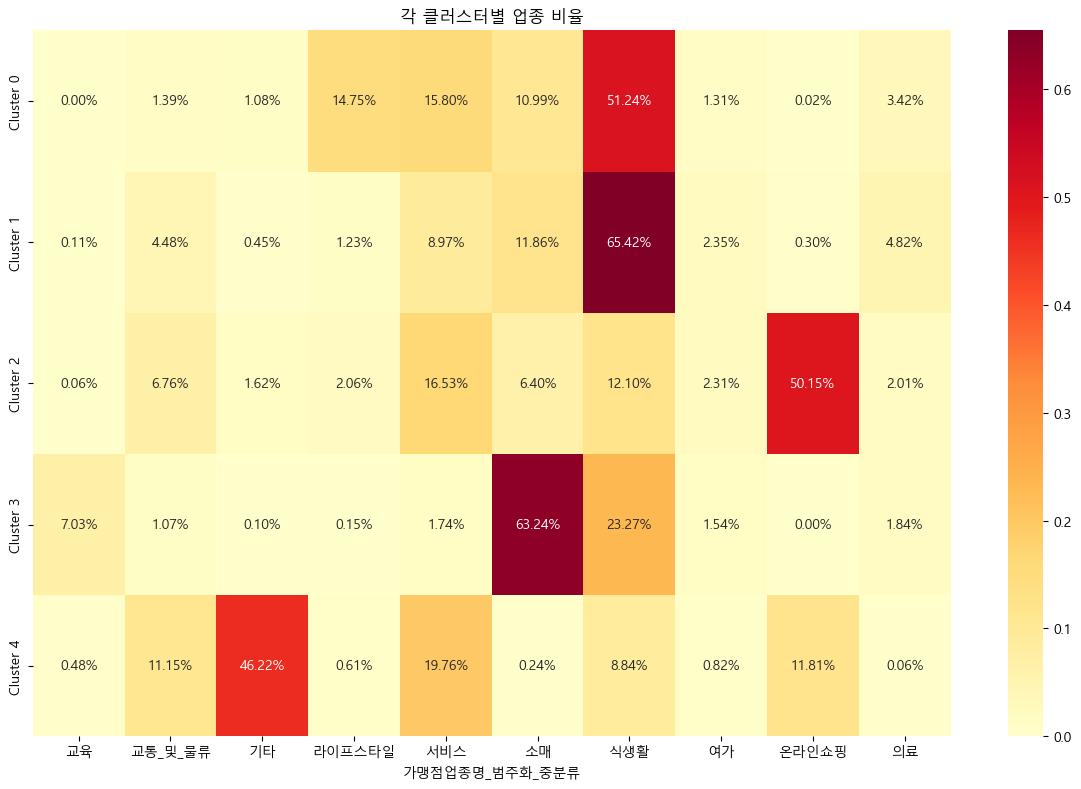

In [61]:
from sklearn.preprocessing import StandardScaler

# 데이터 전처리
# 시군구별 가맹점업종명_범주화 비율 계산
grouped_data = data.groupby(['가맹점_시군구', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(grouped_data)
scaled_data = pd.DataFrame(scaled_data, columns=grouped_data.columns, index=grouped_data.index)

# UMAP 적용
umap_reducer = umap.UMAP(
    n_components=2,
    random_state=42,
    #n_neighbors=15,
    #min_dist=0.1
)
umap_result = umap_reducer.fit_transform(scaled_data)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 결과 데이터프레임 생성
result_df = pd.DataFrame({
    'UMAP_1': umap_result[:, 0],
    'UMAP_2': umap_result[:, 1],
    'Cluster': clusters
})
result_df.index = grouped_data.index

# 시각화
plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(
    data=result_df,
    x='UMAP_1',
    y='UMAP_2',
    hue='Cluster',
    palette='Set1',
    s=100
)

# 시군구 이름 표시
for idx, row in result_df.iterrows():
    plt.annotate(idx, (row['UMAP_1'], row['UMAP_2']), 
                xytext=(5, 5), textcoords='offset points', 
                fontsize=8, alpha=0.7)

plt.title('UMAP with K-means Clustering of Business Type Ratios by Region')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 각 클러스터의 특징 분석
print("\n=== 각 클러스터의 특징 ===\n")
for cluster in range(5):
    cluster_regions = result_df[result_df['Cluster'] == cluster].index
    cluster_means = grouped_data.loc[cluster_regions].mean()
    
    print(f"\nCluster {cluster} 특징:")
    print(f"포함된 지역 수: {len(cluster_regions)}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means.sort_values(ascending=False).items():
        print(f"{category}: {ratio:.1%}")
    
    print("\n대표적인 지역:")
    print(", ".join(cluster_regions[:5]))
    print("-" * 50)

# 클러스터별 업종 비율 히트맵
plt.figure(figsize=(12, 8))
cluster_means = pd.DataFrame([
    grouped_data.loc[result_df[result_df['Cluster'] == i].index].mean()
    for i in range(5)
], index=[f'Cluster {i}' for i in range(5)])

sns.heatmap(cluster_means, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('각 클러스터별 업종 비율')
plt.tight_layout()
plt.show()

In [62]:
# pacmap 설치
#!pip install pacmap
#!pip install --upgrade setuptools
import pacmap

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\pacmap\pacmap.py:845: UserWarning: Warning: random state is set to 42.
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}.')


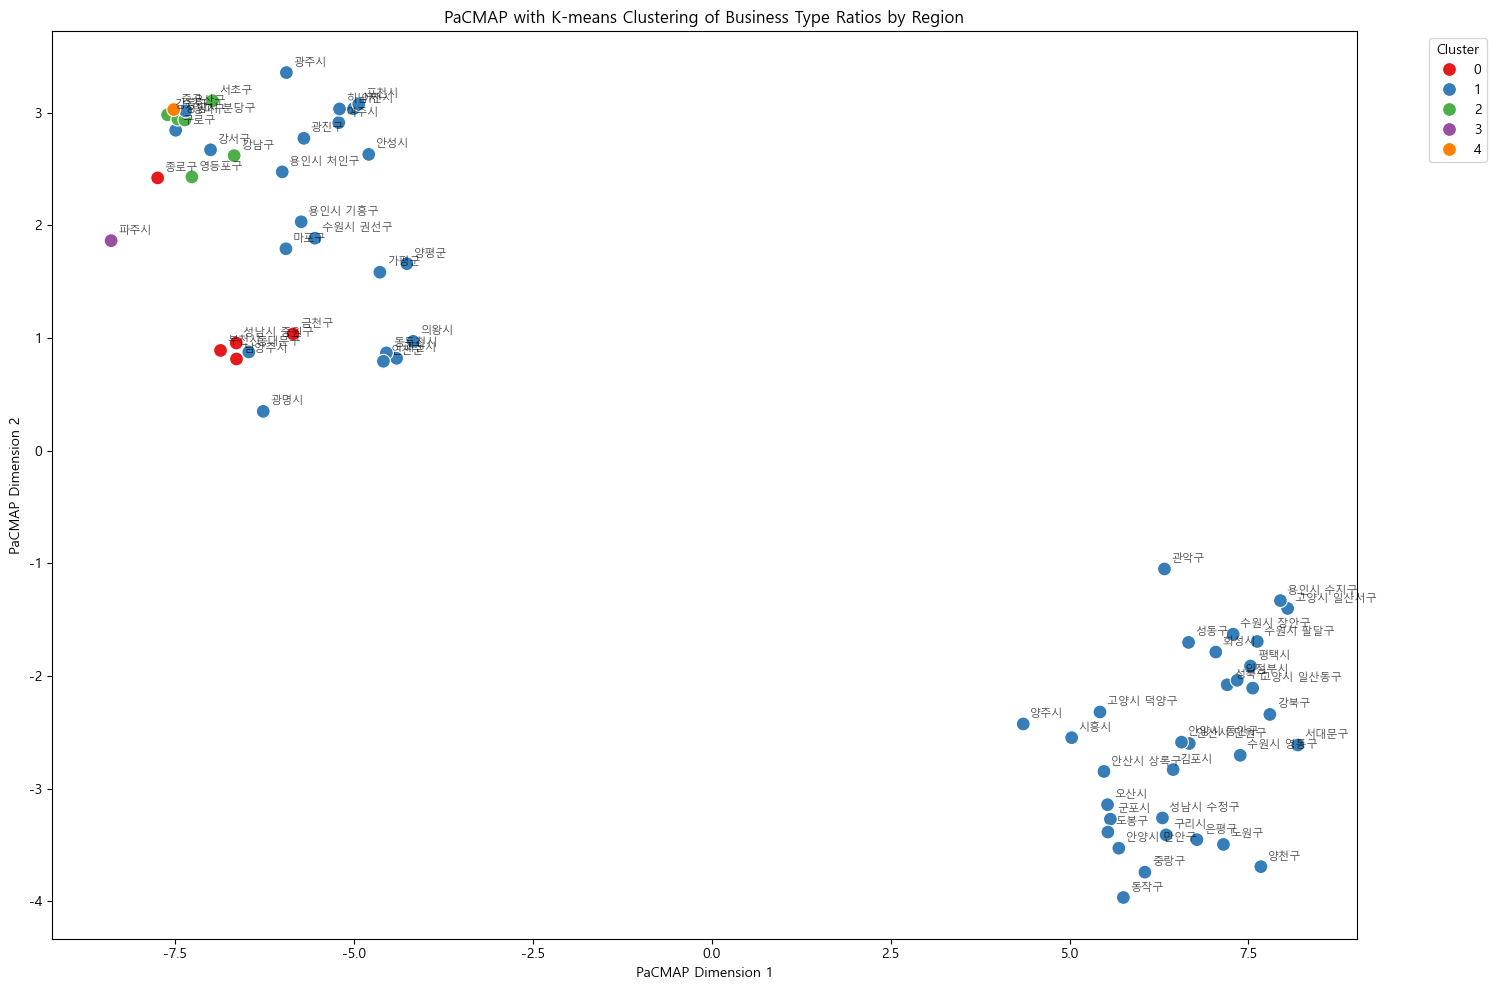


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 지역 수: 5

주요 업종 비율:
식생활: 51.2%
서비스: 15.8%
라이프스타일: 14.8%
소매: 11.0%
의료: 3.4%
교통_및_물류: 1.4%
여가: 1.3%
기타: 1.1%
온라인쇼핑: 0.0%
교육: 0.0%

대표적인 지역:
금천구, 남양주시, 부천시, 성남시 중원구, 종로구
--------------------------------------------------

Cluster 1 특징:
포함된 지역 수: 54

주요 업종 비율:
식생활: 65.4%
소매: 11.9%
서비스: 9.0%
의료: 4.8%
교통_및_물류: 4.5%
여가: 2.3%
라이프스타일: 1.2%
기타: 0.5%
온라인쇼핑: 0.3%
교육: 0.1%

대표적인 지역:
가평군, 강북구, 강서구, 고양시 덕양구, 고양시 일산동구
--------------------------------------------------

Cluster 2 특징:
포함된 지역 수: 6

주요 업종 비율:
온라인쇼핑: 50.2%
서비스: 16.5%
식생활: 12.1%
교통_및_물류: 6.8%
소매: 6.4%
여가: 2.3%
라이프스타일: 2.1%
의료: 2.0%
기타: 1.6%
교육: 0.1%

대표적인 지역:
강남구, 강동구, 서초구, 성남시 분당구, 송파구
--------------------------------------------------

Cluster 3 특징:
포함된 지역 수: 1

주요 업종 비율:
소매: 63.2%
식생활: 23.3%
교육: 7.0%
의료: 1.8%
서비스: 1.7%
여가: 1.5%
교통_및_물류: 1.1%
라이프스타일: 0.1%
기타: 0.1%
온라인쇼핑: 0.0%

대표적인 지역:
파주시
--------------------------------------------------

Cluster 4 특징:
포함된 지역 수: 1

주요 업종 비율:
기타: 46.2%
서비스: 19.8%
온라

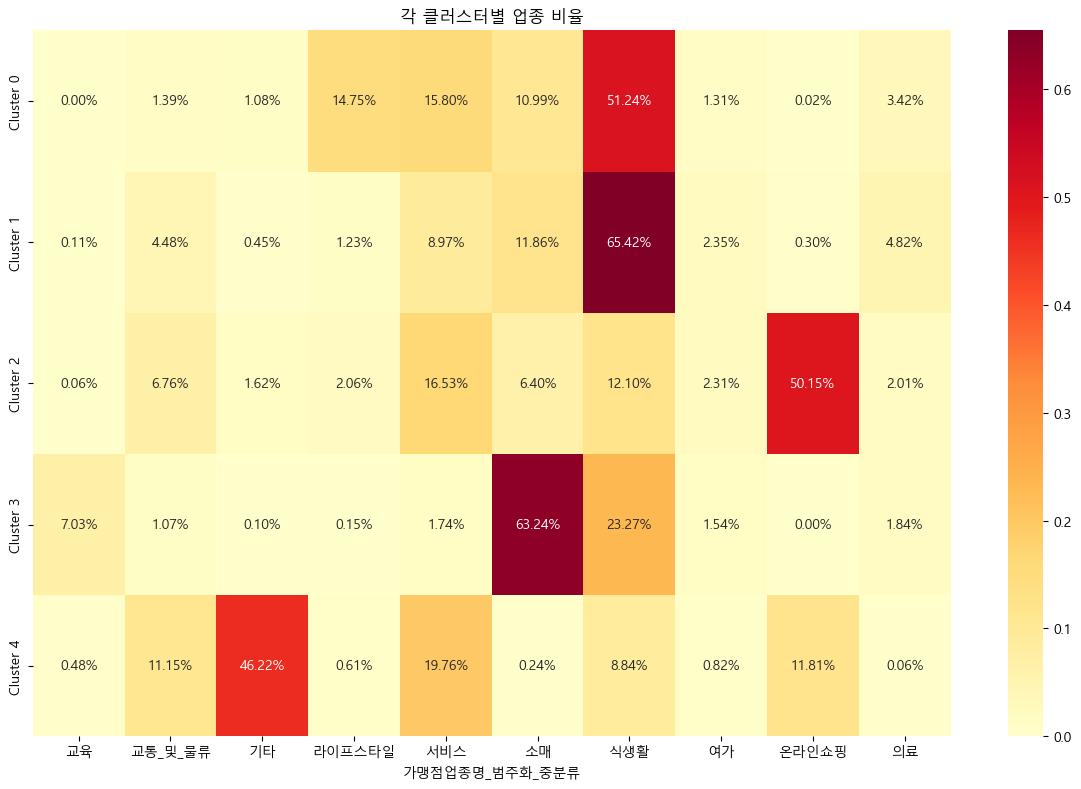

In [63]:
# 데이터 전처리
# 시군구별 가맹점업종명_범주화 비율 계산
grouped_data = data.groupby(['가맹점_시군구', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(grouped_data)
scaled_data = pd.DataFrame(scaled_data, columns=grouped_data.columns, index=grouped_data.index)

# PaCMAP 적용
pacmap_reducer = pacmap.PaCMAP(
    n_components=2,
    random_state=42, 
    MN_ratio=0.5,           # Mid-near 비율
    FP_ratio=2.0,
    n_neighbors=15
)
pacmap_result = pacmap_reducer.fit_transform(scaled_data)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 결과 데이터프레임 생성
result_df = pd.DataFrame({
    'PaCMAP_1': pacmap_result[:, 0],
    'PaCMAP_2': pacmap_result[:, 1],
    'Cluster': clusters
})
result_df.index = grouped_data.index

# 시각화
plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(
    data=result_df,
    x='PaCMAP_1',
    y='PaCMAP_2',
    hue='Cluster',
    palette='Set1',
    s=100
)

# 시군구 이름 표시
for idx, row in result_df.iterrows():
    plt.annotate(idx, (row['PaCMAP_1'], row['PaCMAP_2']), 
                xytext=(5, 5), textcoords='offset points', 
                fontsize=8, alpha=0.7)

plt.title('PaCMAP with K-means Clustering of Business Type Ratios by Region')
plt.xlabel('PaCMAP Dimension 1')
plt.ylabel('PaCMAP Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 각 클러스터의 특징 분석
print("\n=== 각 클러스터의 특징 ===\n")
for cluster in range(5):
    cluster_regions = result_df[result_df['Cluster'] == cluster].index
    cluster_means = grouped_data.loc[cluster_regions].mean()
    
    print(f"\nCluster {cluster} 특징:")
    print(f"포함된 지역 수: {len(cluster_regions)}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means.sort_values(ascending=False).items():
        print(f"{category}: {ratio:.1%}")
    
    print("\n대표적인 지역:")
    print(", ".join(cluster_regions[:5]))
    print("-" * 50)

# 클러스터별 업종 비율 히트맵
plt.figure(figsize=(12, 8))
cluster_means = pd.DataFrame([
    grouped_data.loc[result_df[result_df['Cluster'] == i].index].mean()
    for i in range(5)
], index=[f'Cluster {i}' for i in range(5)])

sns.heatmap(cluster_means, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('각 클러스터별 업종 비율')
plt.tight_layout()
plt.show()

### 소비 패턴 비중을 중심으로 연령대, 성별로 나눈 후 3그룹으로 나누기
- 충분한 증거가 있어야 한다.
- T-sne, Umap, Pacmap 세 가지 모두로 돌려보자.

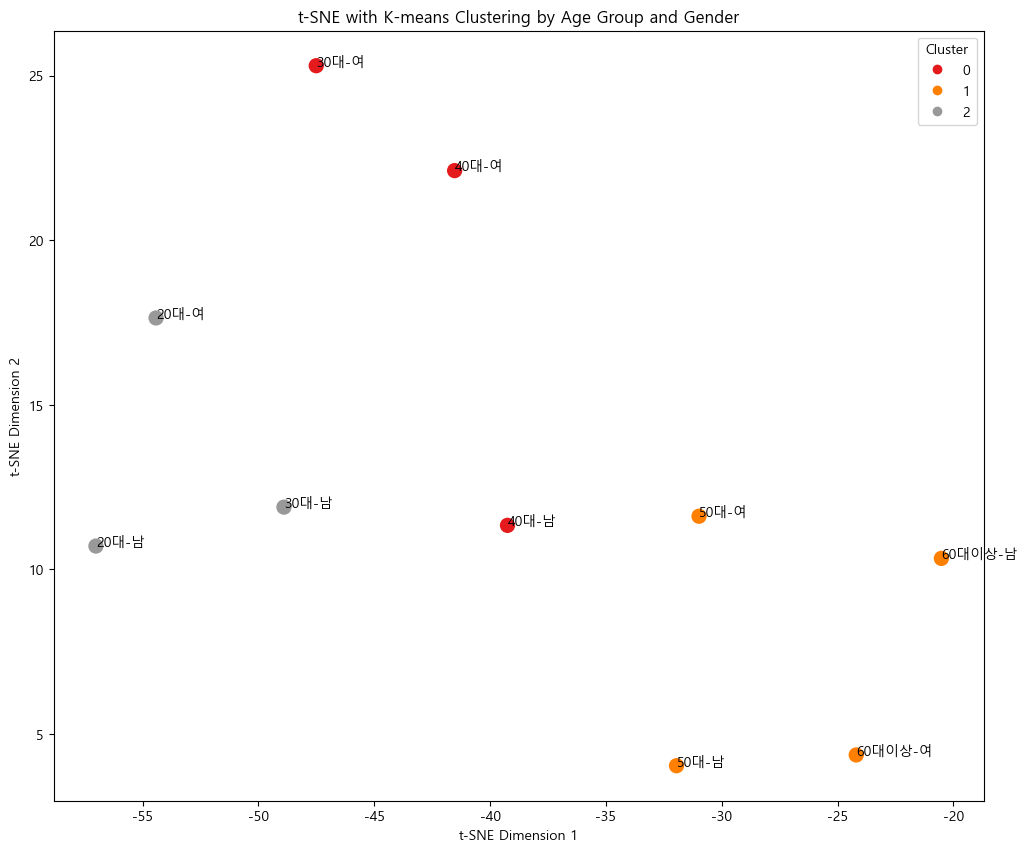


각 클러스터별 구성:

클러스터 0:
[('30대', '여'), ('40대', '남'), ('40대', '여')]

클러스터 1:
[('50대', '남'), ('50대', '여'), ('60대이상', '남'), ('60대이상', '여')]

클러스터 2:
[('20대', '남'), ('20대', '여'), ('30대', '남')]


각 클러스터별 평균 업종 비율:


<Figure size 1200x800 with 0 Axes>

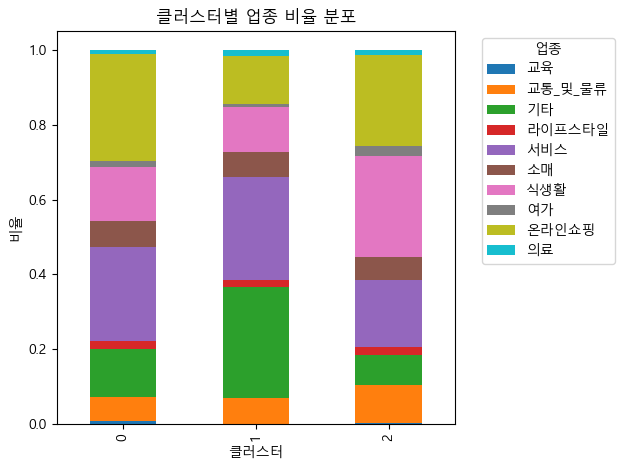

In [64]:
# T-sne 사용

dat_sne = pd.crosstab(
    index=[data['연령대'], data['성별']], 
    columns=data['가맹점업종명_범주화_중분류'],
    normalize='index'
)

# t-SNE를 사용하여 차원 축소
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_result = tsne.fit_transform(dat_sne)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=3, random_state=42)
dat_sne['Cluster'] = kmeans.fit_predict(tsne_result)

# t-SNE 결과를 데이터프레임에 추가
dat_sne['t-SNE_1'] = tsne_result[:, 0]
dat_sne['t-SNE_2'] = tsne_result[:, 1]

# 시각화
plt.figure(figsize=(12, 10))
scatter = plt.scatter(
    dat_sne['t-SNE_1'],
    dat_sne['t-SNE_2'], 
    c=dat_sne['Cluster'],
    cmap='Set1',
    s=100
)

# 각 점에 연령대와 성별 표시
for idx, row in dat_sne.iterrows():
    plt.annotate(f"{idx[0]}-{idx[1]}", (row['t-SNE_1'], row['t-SNE_2']))

plt.title('t-SNE with K-means Clustering by Age Group and Gender')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()

# 각 클러스터의 구성 출력
print("\n각 클러스터별 구성:")
for cluster in range(3):
    print(f"\n클러스터 {cluster}:")
    print(dat_sne[dat_sne['Cluster'] == cluster].index.tolist())
    
# 시각화 - Stacked Bar Plot 사용
print("\n\n각 클러스터별 평균 업종 비율:")
cluster_means = dat_sne.groupby('Cluster')[['교육', '교통_및_물류', '기타', '라이프스타일', '서비스', '소매', '식생활', '여가', '온라인쇼핑', '의료']].mean()

plt.figure(figsize=(12, 8))
cluster_means.plot(kind='bar', stacked=True)
plt.title('클러스터별 업종 비율 분포')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


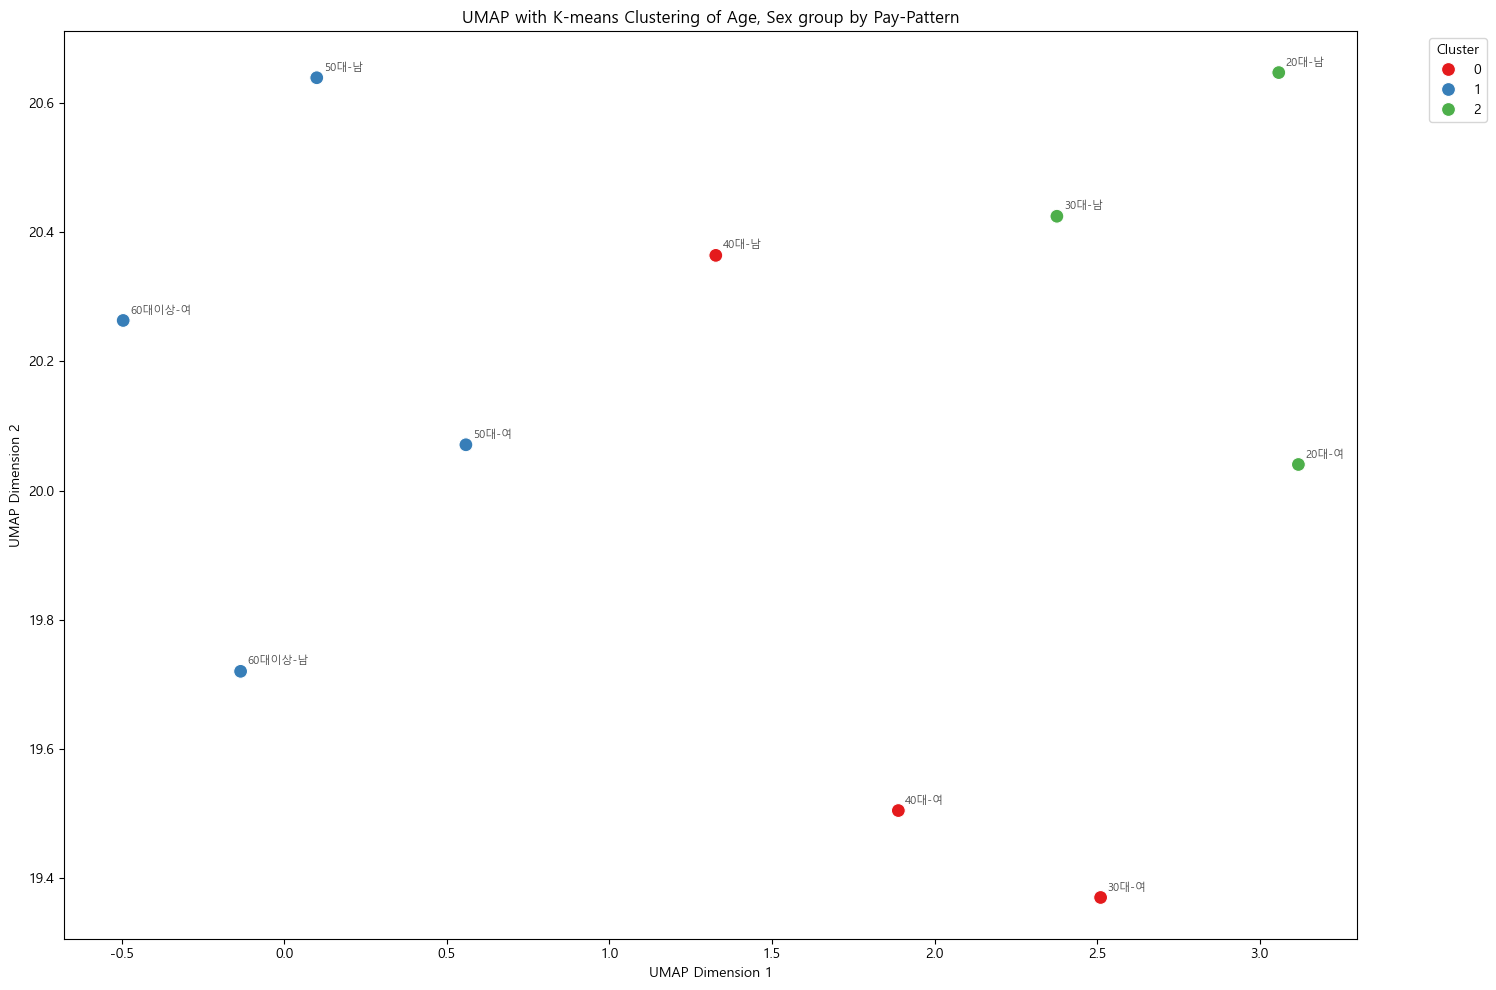


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 집단 수: 3

주요 업종 비율:
온라인쇼핑: 28.4%
서비스: 25.1%
식생활: 14.5%
기타: 12.9%
소매: 7.1%
교통_및_물류: 6.2%
라이프스타일: 2.2%
여가: 1.6%
의료: 1.2%
교육: 0.9%

대표적인 그룹:
30대-여, 40대-남, 40대-여
--------------------------------------------------

Cluster 1 특징:
포함된 집단 수: 4

주요 업종 비율:
기타: 29.7%
서비스: 27.5%
온라인쇼핑: 12.7%
식생활: 12.1%
교통_및_물류: 6.9%
소매: 6.7%
라이프스타일: 1.8%
의료: 1.7%
여가: 0.8%
교육: 0.1%

대표적인 그룹:
50대-남, 50대-여, 60대이상-남, 60대이상-여
--------------------------------------------------

Cluster 2 특징:
포함된 집단 수: 3

주요 업종 비율:
식생활: 27.0%
온라인쇼핑: 24.3%
서비스: 17.9%
교통_및_물류: 10.4%
기타: 7.9%
소매: 6.1%
여가: 2.8%
라이프스타일: 2.3%
의료: 1.3%
교육: 0.1%

대표적인 그룹:
20대-남, 20대-여, 30대-남
--------------------------------------------------


각 클러스터별 평균 업종 비율:


<Figure size 1200x800 with 0 Axes>

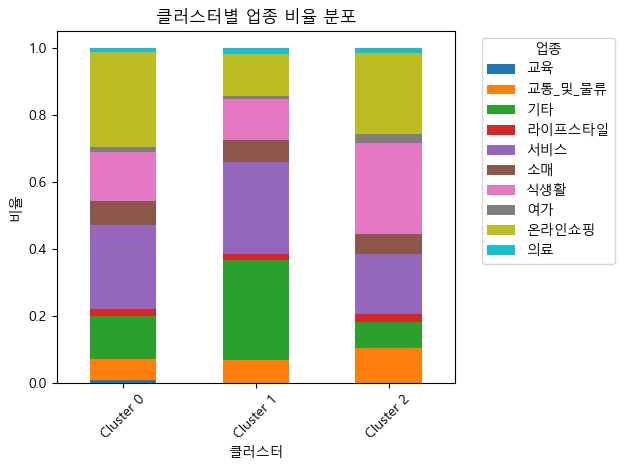

In [65]:
# Umap 사용

# 데이터 전처리
dat_sne = pd.crosstab(
    index=[data['연령대'], data['성별']], 
    columns=data['가맹점업종명_범주화_중분류'],
    normalize='index'
)

# UMAP 적용
umap_reducer = umap.UMAP(
    n_components=2,
    random_state=42,
    n_neighbors=5,  # 데이터 크기가 작으므로 n_neighbors 값을 줄임
    min_dist=0.1
)
umap_result = umap_reducer.fit_transform(dat_sne)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(umap_result)  # umap_result로 클러스터링

# 결과 데이터프레임 생성
result_df = pd.DataFrame({
    'UMAP_1': umap_result[:, 0],
    'UMAP_2': umap_result[:, 1],
    'Cluster': clusters
})
result_df.index = dat_sne.index  # dat_sne의 인덱스 사용

# 시각화
plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(
    data=result_df,
    x='UMAP_1',
    y='UMAP_2',
    hue='Cluster',
    palette='Set1',
    s=100
)

# 레이블 표시
for idx, row in result_df.iterrows():
    plt.annotate(f"{idx[0]}-{idx[1]}", 
                (row['UMAP_1'], row['UMAP_2']), 
                xytext=(5, 5), 
                textcoords='offset points', 
                fontsize=8, 
                alpha=0.7)

plt.title('UMAP with K-means Clustering of Age, Sex group by Pay-Pattern')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 각 클러스터의 특징 분석
print("\n=== 각 클러스터의 특징 ===\n")
for cluster in range(3):  # 3개 클러스터로 수정
    cluster_members = result_df[result_df['Cluster'] == cluster].index
    cluster_means = dat_sne.loc[cluster_members].mean()
    
    print(f"\nCluster {cluster} 특징:")
    print(f"포함된 집단 수: {len(cluster_members)}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means.sort_values(ascending=False).items():
        print(f"{category}: {ratio:.1%}")
    
    print("\n대표적인 그룹:")
    print(", ".join([f"{idx[0]}-{idx[1]}" for idx in cluster_members[:5]]))
    print("-" * 50)

# 시각화 - Stacked Bar Plot 사용
print("\n\n각 클러스터별 평균 업종 비율:")

# 각 클러스터별 평균 업종 비율 계산
cluster_means = []
for cluster in range(3):
    cluster_members = result_df[result_df['Cluster'] == cluster].index
    cluster_mean = dat_sne.loc[cluster_members].mean()
    cluster_means.append(cluster_mean)

# DataFrame으로 변환
cluster_means_df = pd.DataFrame(cluster_means, index=[f'Cluster {i}' for i in range(3)])

# Stacked Bar Plot 그리기
plt.figure(figsize=(12, 8))
cluster_means_df.plot(kind='bar', stacked=True)
plt.title('클러스터별 업종 비율 분포')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 왜 안되는가?
- pacmap은 대규모 데이터를 다루는 데 특화되어있어서 꼴랑 12개짜리 그룹인 데이터는 비효율적이다.
- k-means를 사용해야 한다.

In [66]:
'''

# Pacmap을 사용해보자.

# 데이터 전처리
# 연령대, 성별별 가맹점업종명_범주화_중분류 비율 계산
grouped_data = data.groupby(['연령대', '성별', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(grouped_data)
scaled_data = pd.DataFrame(scaled_data, columns=grouped_data.columns, index=grouped_data.index)

scaled_data = grouped_data
# PaCMAP 적용
pacmap_reducer = pacmap.PaCMAP(
    n_components=2,
    random_state=42, 
    MN_ratio=0.5,           # Mid-near 비율
    FP_ratio=2.0,
    n_neighbors=4
)
pacmap_result = pacmap_reducer.fit_transform(scaled_data)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 결과 데이터프레임 생성
result_df = pd.DataFrame({
    'PaCMAP_1': pacmap_result[:, 0],
    'PaCMAP_2': pacmap_result[:, 1],
    'Cluster': clusters
})
result_df.index = grouped_data.index

# 시각화
plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(
    data=result_df,
    x='PaCMAP_1',
    y='PaCMAP_2',
    hue='Cluster',
    palette='Set1',
    s=100
)

# 연령대-성별 표시
for idx, row in result_df.iterrows():
    plt.annotate(f"{idx[0]}-{idx[1]}", (row['PaCMAP_1'], row['PaCMAP_2']), 
                xytext=(5, 5), textcoords='offset points', 
                fontsize=8, alpha=0.7)

plt.title('PaCMAP with K-means Clustering of Age, Sex group by Business Type Ratios')
plt.xlabel('PaCMAP Dimension 1')
plt.ylabel('PaCMAP Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 각 클러스터의 특징 분석
print("\n=== 각 클러스터의 특징 ===\n")
for cluster in range(3):
    cluster_groups = result_df[result_df['Cluster'] == cluster].index
    cluster_means = grouped_data.loc[cluster_groups].mean()
    
    print(f"\nCluster {cluster} 특징:")
    print(f"포함된 그룹 수: {len(cluster_groups)}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means.sort_values(ascending=False).items():
        print(f"{category}: {ratio:.1%}")
    
    print("\n대표적인 그룹:")
    print(", ".join([f"{idx[0]}-{idx[1]}" for idx in cluster_groups[:5]]))
    print("-" * 50)

# 클러스터별 업종 비율 히트맵
plt.figure(figsize=(12, 8))
cluster_means = pd.DataFrame([
    grouped_data.loc[result_df[result_df['Cluster'] == i].index].mean()
    for i in range(3)
], index=[f'Cluster {i}' for i in range(3)])

sns.heatmap(cluster_means, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('각 클러스터별 업종 비율')
plt.tight_layout()
plt.show()

# Stacked Bar Plot 그리기
plt.figure(figsize=(12, 8))
cluster_means.plot(kind='bar', stacked=True)
plt.title('클러스터별 업종 비율 분포')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

'''

'\n\n# Pacmap을 사용해보자.\n\n# 데이터 전처리\n# 연령대, 성별별 가맹점업종명_범주화_중분류 비율 계산\ngrouped_data = data.groupby([\'연령대\', \'성별\', \'가맹점업종명_범주화_중분류\']).size().unstack(fill_value=0)\ngrouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환\n\n# 데이터 스케일링\nscaler = StandardScaler()\nscaled_data = scaler.fit_transform(grouped_data)\nscaled_data = pd.DataFrame(scaled_data, columns=grouped_data.columns, index=grouped_data.index)\n\nscaled_data = grouped_data\n# PaCMAP 적용\npacmap_reducer = pacmap.PaCMAP(\n    n_components=2,\n    random_state=42, \n    MN_ratio=0.5,           # Mid-near 비율\n    FP_ratio=2.0,\n    n_neighbors=4\n)\npacmap_result = pacmap_reducer.fit_transform(scaled_data)\n\n# K-means 클러스터링 적용\nkmeans = KMeans(n_clusters=3, random_state=42)\nclusters = kmeans.fit_predict(scaled_data)\n\n# 결과 데이터프레임 생성\nresult_df = pd.DataFrame({\n    \'PaCMAP_1\': pacmap_result[:, 0],\n    \'PaCMAP_2\': pacmap_result[:, 1],\n    \'Cluster\': clusters\n})\nresult_df.index = grouped_data.inde

# 소비 패턴 파악
- 패턴 파악을 먼저

### 차이검정 (Difference Test)

**차이검정**이란 두 개 이상의 집단에서 얻어진 데이터의 평균이나 분포에 차이가 있는지를 통계적으로 검정하는 기법입니다. 이 방법은 연구자가 **A/B 테스트**를 하거나, **집단 간 비교**를 할 때 주로 사용됩니다. 예를 들어, 새로운 광고 캠페인이 기존 캠페인보다 효과적인지 확인할 때, 또는 두 약물의 효과 차이를 비교할 때 유용합니다.

### 주요 차이검정 기법

1. **t-검정 (t-test)**
   - **독립표본 t-검정**: 서로 다른 두 집단의 평균을 비교할 때 사용합니다. 예를 들어, 남성과 여성의 키 평균 차이를 검정할 때.
   - **대응표본 t-검정 (paired t-test)**: 동일한 집단에서 두 번 측정한 데이터를 비교할 때 사용합니다. 예를 들어, 다이어트 전후의 체중 변화 비교.
   - **단일표본 t-검정 (one-sample t-test)**: 표본 평균이 특정 기준값과 다른지를 검정합니다.

2. **ANOVA (분산분석)**
   - 세 개 이상의 집단 간 평균 차이를 비교할 때 사용합니다. 예를 들어, 세 개의 마케팅 전략이 서로 다른 성과를 보이는지를 검정할 때.
   - **일원분산분석 (One-way ANOVA)**: 한 가지 독립변수에 대해 집단 간 차이를 분석.
   - **이원분산분석 (Two-way ANOVA)**: 두 가지 독립변수 간의 상호작용 효과를 분석.

3. **카이제곱 검정 (Chi-square test)**
   - 명목형 데이터 간의 분포 차이를 검정할 때 사용합니다. 예를 들어, 성별에 따라 선호하는 브랜드가 다른지를 분석할 때.
   - **적합도 검정**과 **독립성 검정**이 대표적입니다.

4. **Mann-Whitney U 검정**
   - 두 집단의 분포가 동일한지를 비교하는 비모수 검정입니다. 데이터가 정규분포를 따르지 않는 경우 사용합니다.

5. **Wilcoxon Signed-Rank Test**
   - 대응표본에 대해 비모수 검정을 수행합니다. 예를 들어, 약물 사용 전후의 통증 점수 비교 시.

6. **Kruskal-Wallis Test**
   - ANOVA의 비모수 버전으로, 세 개 이상의 독립 집단 간 차이를 검정합니다.

### 차이검정의 기본 가정

1. **정규성 가정**: 데이터가 정규분포를 따른다고 가정합니다. 정규성을 만족하지 않을 경우 비모수 검정을 사용합니다.
2. **등분산성 가정**: 각 집단의 분산이 동일하다고 가정합니다. 이 가정이 충족되지 않으면 Welch의 t-검정을 사용할 수 있습니다.
3. **독립성 가정**: 비교하고자 하는 집단이 서로 독립적이어야 합니다.

### 예시

#### 예시 1: 독립표본 t-검정
- 문제: A 마케팅 캠페인과 B 마케팅 캠페인의 전환율 차이를 비교하고 싶습니다.
- 검정 방법: 독립표본 t-검정을 사용하여 두 집단의 전환율 평균 차이를 검정합니다.

#### 예시 2: 대응표본 t-검정
- 문제: 신약을 투여하기 전과 후의 혈압 변화를 비교하고 싶습니다.
- 검정 방법: 대응표본 t-검정을 사용하여 동일한 집단의 두 시점 간 평균 차이를 분석합니다.

### 주의사항

- **p-value**: 차이검정에서 중요한 요소로, 귀무가설이 참이라는 가정 하에 현재 데이터를 관찰할 확률입니다. 일반적으로 p-value가 0.05 이하이면 귀무가설을 기각하고 유의미한 차이가 있다고 판단합니다.
- **효과 크기**: 차이가 통계적으로 유의미하더라도 실제 효과 크기가 작으면 실무에 의미가 없을 수 있습니다.

### 정리

차이검정은 집단 간의 차이를 분석하고 해석하는 데 필수적인 통계 기법입니다. 데이터의 분포와 연구 목적에 따라 적절한 차이검정 방법을 선택하는 것이 중요합니다.